# WorldQuant University Capstone Project

## Topic 6: Value-at-Risk Methodologies under Commodities track

## Title: Estimating Portfolio Risk using Value-at-Risk and Expected Shortfall: A Comparative Study of Traditional and EVT Approaches

Composed By:
* Bryan Mutua Kibui
* Nicholas Johnson

Note: This is still a work in progress.

# Code Design Plan

* Downloading the price data for the assets we are going to analyse
* Run EDA on the data and do descriptive statistics on each asset property
* Using different methods to estimate VAR of each asset within the asset classes
* Discern and elaborate on the differences between the VAR estimated values
* Repeat similar methods to estimate the ES of each asset
* Explain the differences between the emphasis on VAR and ES
* From the analysis, we will try to build several portfolios which optimise for VAR and ES
* We will hopefully experiment with rolling VAR  across different market regimes

### Importing Required Libraries For Codes

In [ ]:
# === Core Libraries ===
import numpy as np
import pandas as pd

# === Visualization ===
import matplotlib.pyplot as plt
import seaborn as sns

# === Statistical Functions ===
from scipy.stats import norm, gaussian_kde, genpareto

# === Data Acquisition ===
import yfinance as yf


### Retrieving Daily Price Data for the Different Asset Classes from Yahoo Finance Spanning From 2010 to 2024

In [ ]:
# ========================
# Asset Lists
# ========================
assets = {
    'Equities': [
        'SPY', 'XLF', 'XLE', 'XLK', 'XLV', 'XLY', 'XLP', 'XLRE'
    ],
    'Commodities': [
        'GC=F', 'BZ=F', 'HG=F', 'ZC=F'
    ],
    'Bonds': [
        'TLT', 'SHY', 'BND', 'LQD', 'EMB'
    ],
    'Cryptos': [
        'BTC-USD', 'ETH-USD'
    ],
    'Forex': [
        'EURUSD=X', 'USDJPY=X', 'AUDUSD=X', 'USDCAD=X'
    ]
}

# Flatten ticker list
all_tickers = [ticker for group in assets.values() for ticker in group]

# ========================
# Download Config
# ========================
start_date = "2010-01-01"
end_date = "2024-12-31"

# ========================
# Download OHLCV Data
# ========================
asset_data = {}

for symbol in all_tickers:
    print(f"🔄 Fetching: {symbol}")
    try:
        df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]
        if not df.empty:
            asset_data[symbol] = df
            df.to_csv(f"{symbol.replace('=','').replace('-','_')}_ohlcv.csv")
        else:
            print(f"⚠️ No data for {symbol}.")
    except Exception as e:
        print(f"❌ Error fetching {symbol}: {e}")

print("✅ All downloads complete.")


🔄 Fetching: SPY


/tmp/ipython-input-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]


🔄 Fetching: XLF


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]


🔄 Fetching: XLE


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]


🔄 Fetching: XLK


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]


🔄 Fetching: XLV


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]


🔄 Fetching: XLY


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]


🔄 Fetching: XLP


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]


🔄 Fetching: XLRE


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]
[*********************100%***********************]  1 of 1 completed

🔄 Fetching: GC=F



/tmp/ipython-input-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]
[*********************100%***********************]  1 of 1 completed

🔄 Fetching: BZ=F



/tmp/ipython-input-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]
[*********************100%***********************]  1 of 1 completed


🔄 Fetching: HG=F
🔄 Fetching: ZC=F


/tmp/ipython-input-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]


🔄 Fetching: TLT


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]


🔄 Fetching: SHY


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]


🔄 Fetching: BND


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]


🔄 Fetching: LQD


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]


🔄 Fetching: EMB


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]
[*********************100%***********************]  1 of 1 completed

🔄 Fetching: BTC-USD



/tmp/ipython-input-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]
[*********************100%***********************]  1 of 1 completed

🔄 Fetching: ETH-USD
🔄 Fetching: EURUSD=X



/tmp/ipython-input-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]


🔄 Fetching: USDJPY=X


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]
[*********************100%***********************]  1 of 1 completed

🔄 Fetching: AUDUSD=X



/tmp/ipython-input-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]
[*********************100%***********************]  1 of 1 completed

🔄 Fetching: USDCAD=X
✅ All downloads complete.


### Generate Plots for the Original Price Data

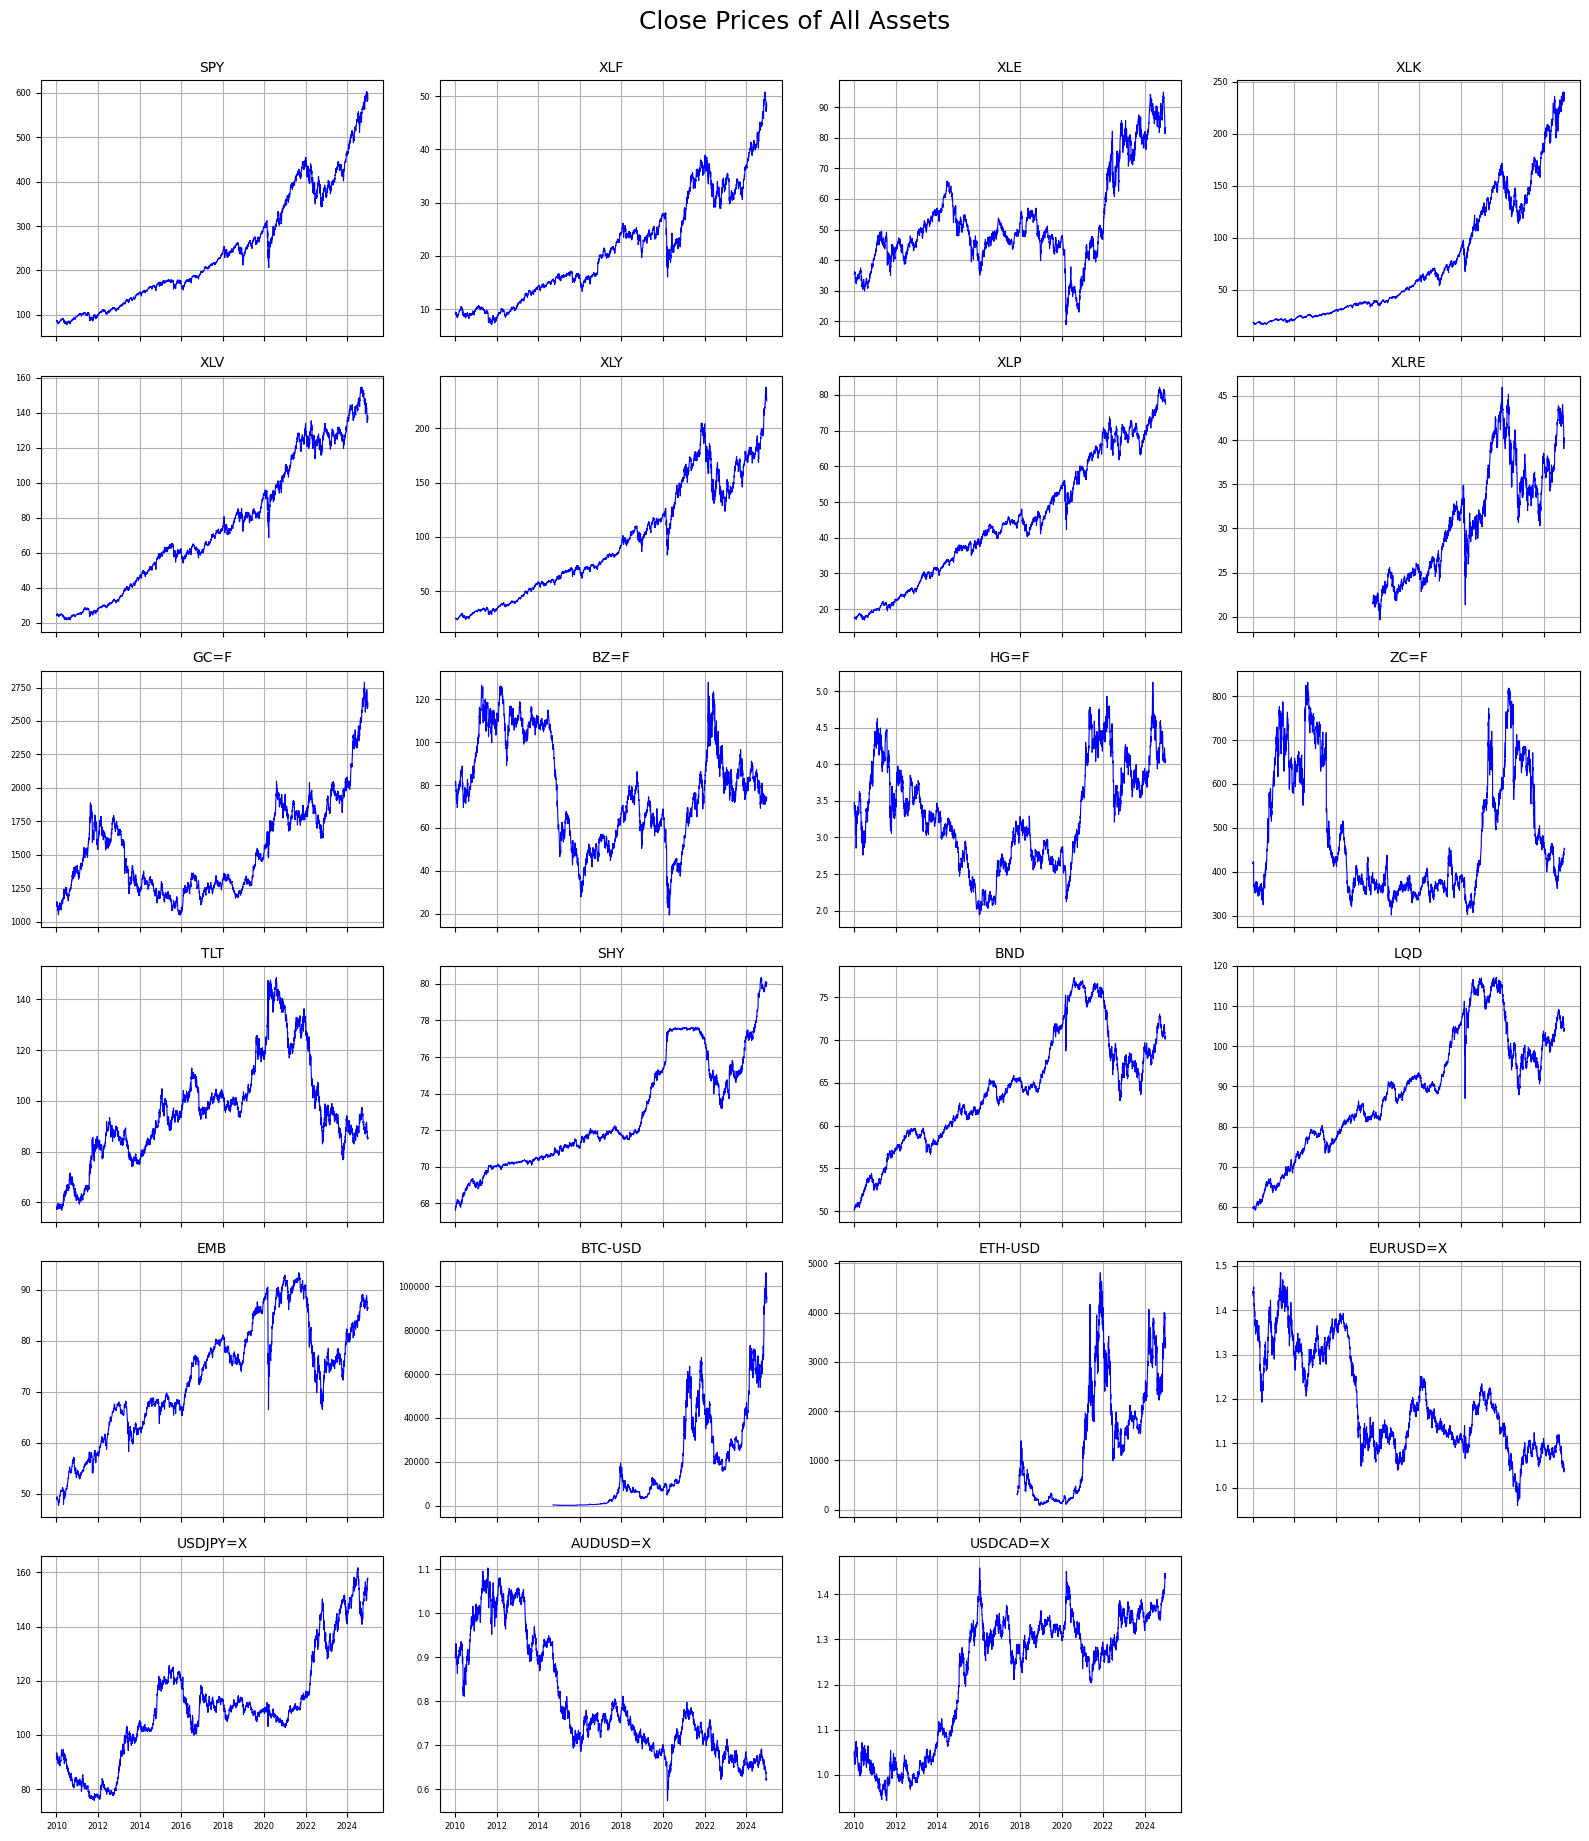

In [ ]:
def plot_all_close_prices_grid(data_dict, rows=17, cols=4):
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3), sharex=True)
    axes = axes.flatten()  # Flatten for easy indexing

    for idx, (symbol, df) in enumerate(data_dict.items()):
        if idx >= rows * cols:
            print(f"Only plotting first {rows * cols} assets.")
            break
        if df.empty or 'Close' not in df:
            continue

        ax = axes[idx]
        ax.plot(df.index, df['Close'], color='blue', linewidth=0.8)
        ax.set_title(symbol, fontsize=10)
        ax.tick_params(axis='both', which='both', labelsize=6)
        ax.grid(True)

    # Hide any unused subplots
    for i in range(len(data_dict), rows * cols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.suptitle("Close Prices of All Assets", fontsize=18, y=1.02)
    plt.show()

# Plot
plot_all_close_prices_grid(asset_data, rows=6, cols=4)


Total assets: 23
SPY: 2010-01-04 to 2024-12-30, 3773 rows
XLF: 2010-01-04 to 2024-12-30, 3773 rows
XLE: 2010-01-04 to 2024-12-30, 3773 rows
XLK: 2010-01-04 to 2024-12-30, 3773 rows
XLV: 2010-01-04 to 2024-12-30, 3773 rows
XLY: 2010-01-04 to 2024-12-30, 3773 rows
XLP: 2010-01-04 to 2024-12-30, 3773 rows
XLRE: 2015-10-08 to 2024-12-30, 2322 rows
GC=F: 2010-01-04 to 2024-12-30, 3770 rows
BZ=F: 2010-01-04 to 2024-12-30, 3740 rows
HG=F: 2010-01-04 to 2024-12-30, 3771 rows
ZC=F: 2010-01-04 to 2024-12-30, 3769 rows
TLT: 2010-01-04 to 2024-12-30, 3773 rows
SHY: 2010-01-04 to 2024-12-30, 3773 rows
BND: 2010-01-04 to 2024-12-30, 3773 rows
LQD: 2010-01-04 to 2024-12-30, 3773 rows
EMB: 2010-01-04 to 2024-12-30, 3773 rows
BTC-USD: 2014-09-17 to 2024-12-30, 3758 rows
ETH-USD: 2017-11-09 to 2024-12-30, 2609 rows
EURUSD=X: 2010-01-01 to 2024-12-30, 3907 rows
USDJPY=X: 2010-01-01 to 2024-12-30, 3907 rows
AUDUSD=X: 2010-01-01 to 2024-12-30, 3906 rows
USDCAD=X: 2010-01-01 to 2024-12-30, 3906 rows

Descri

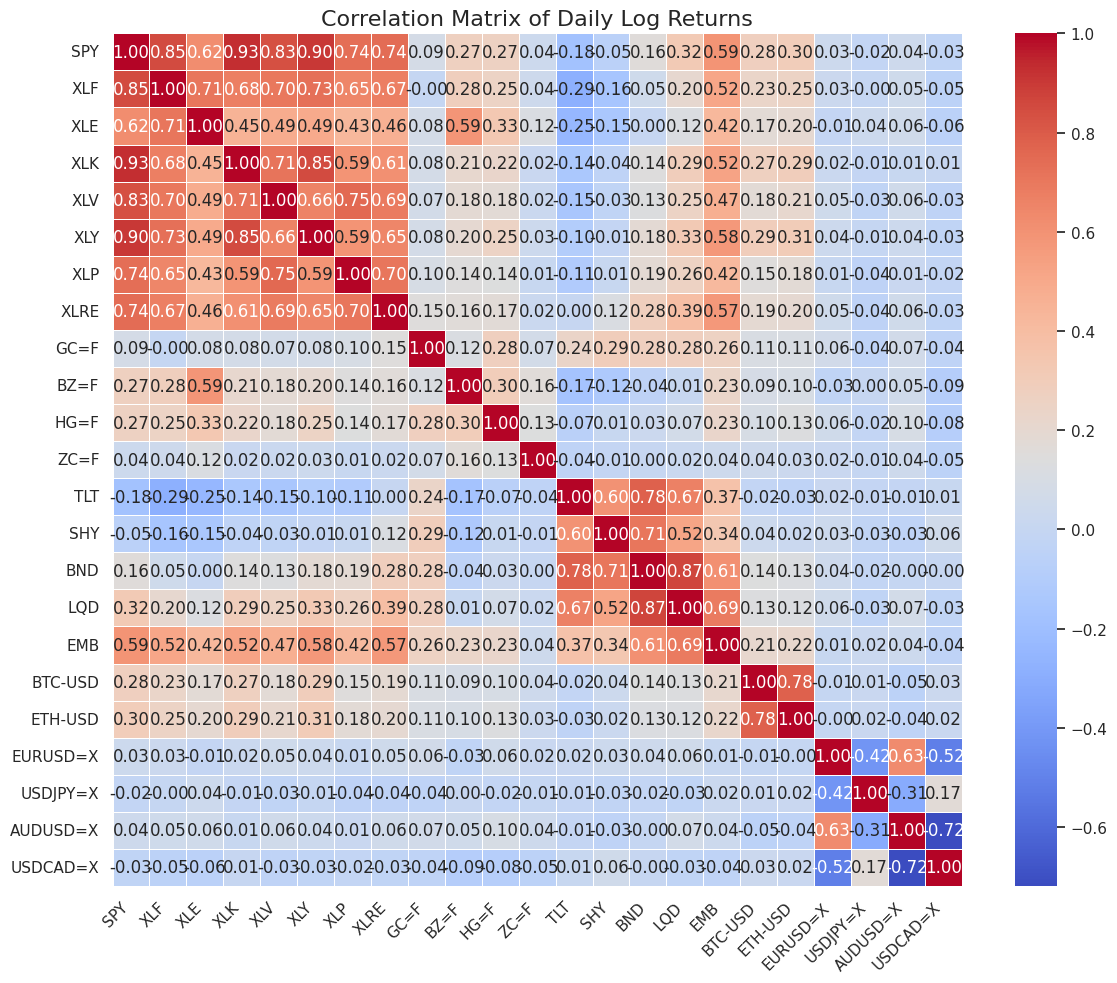

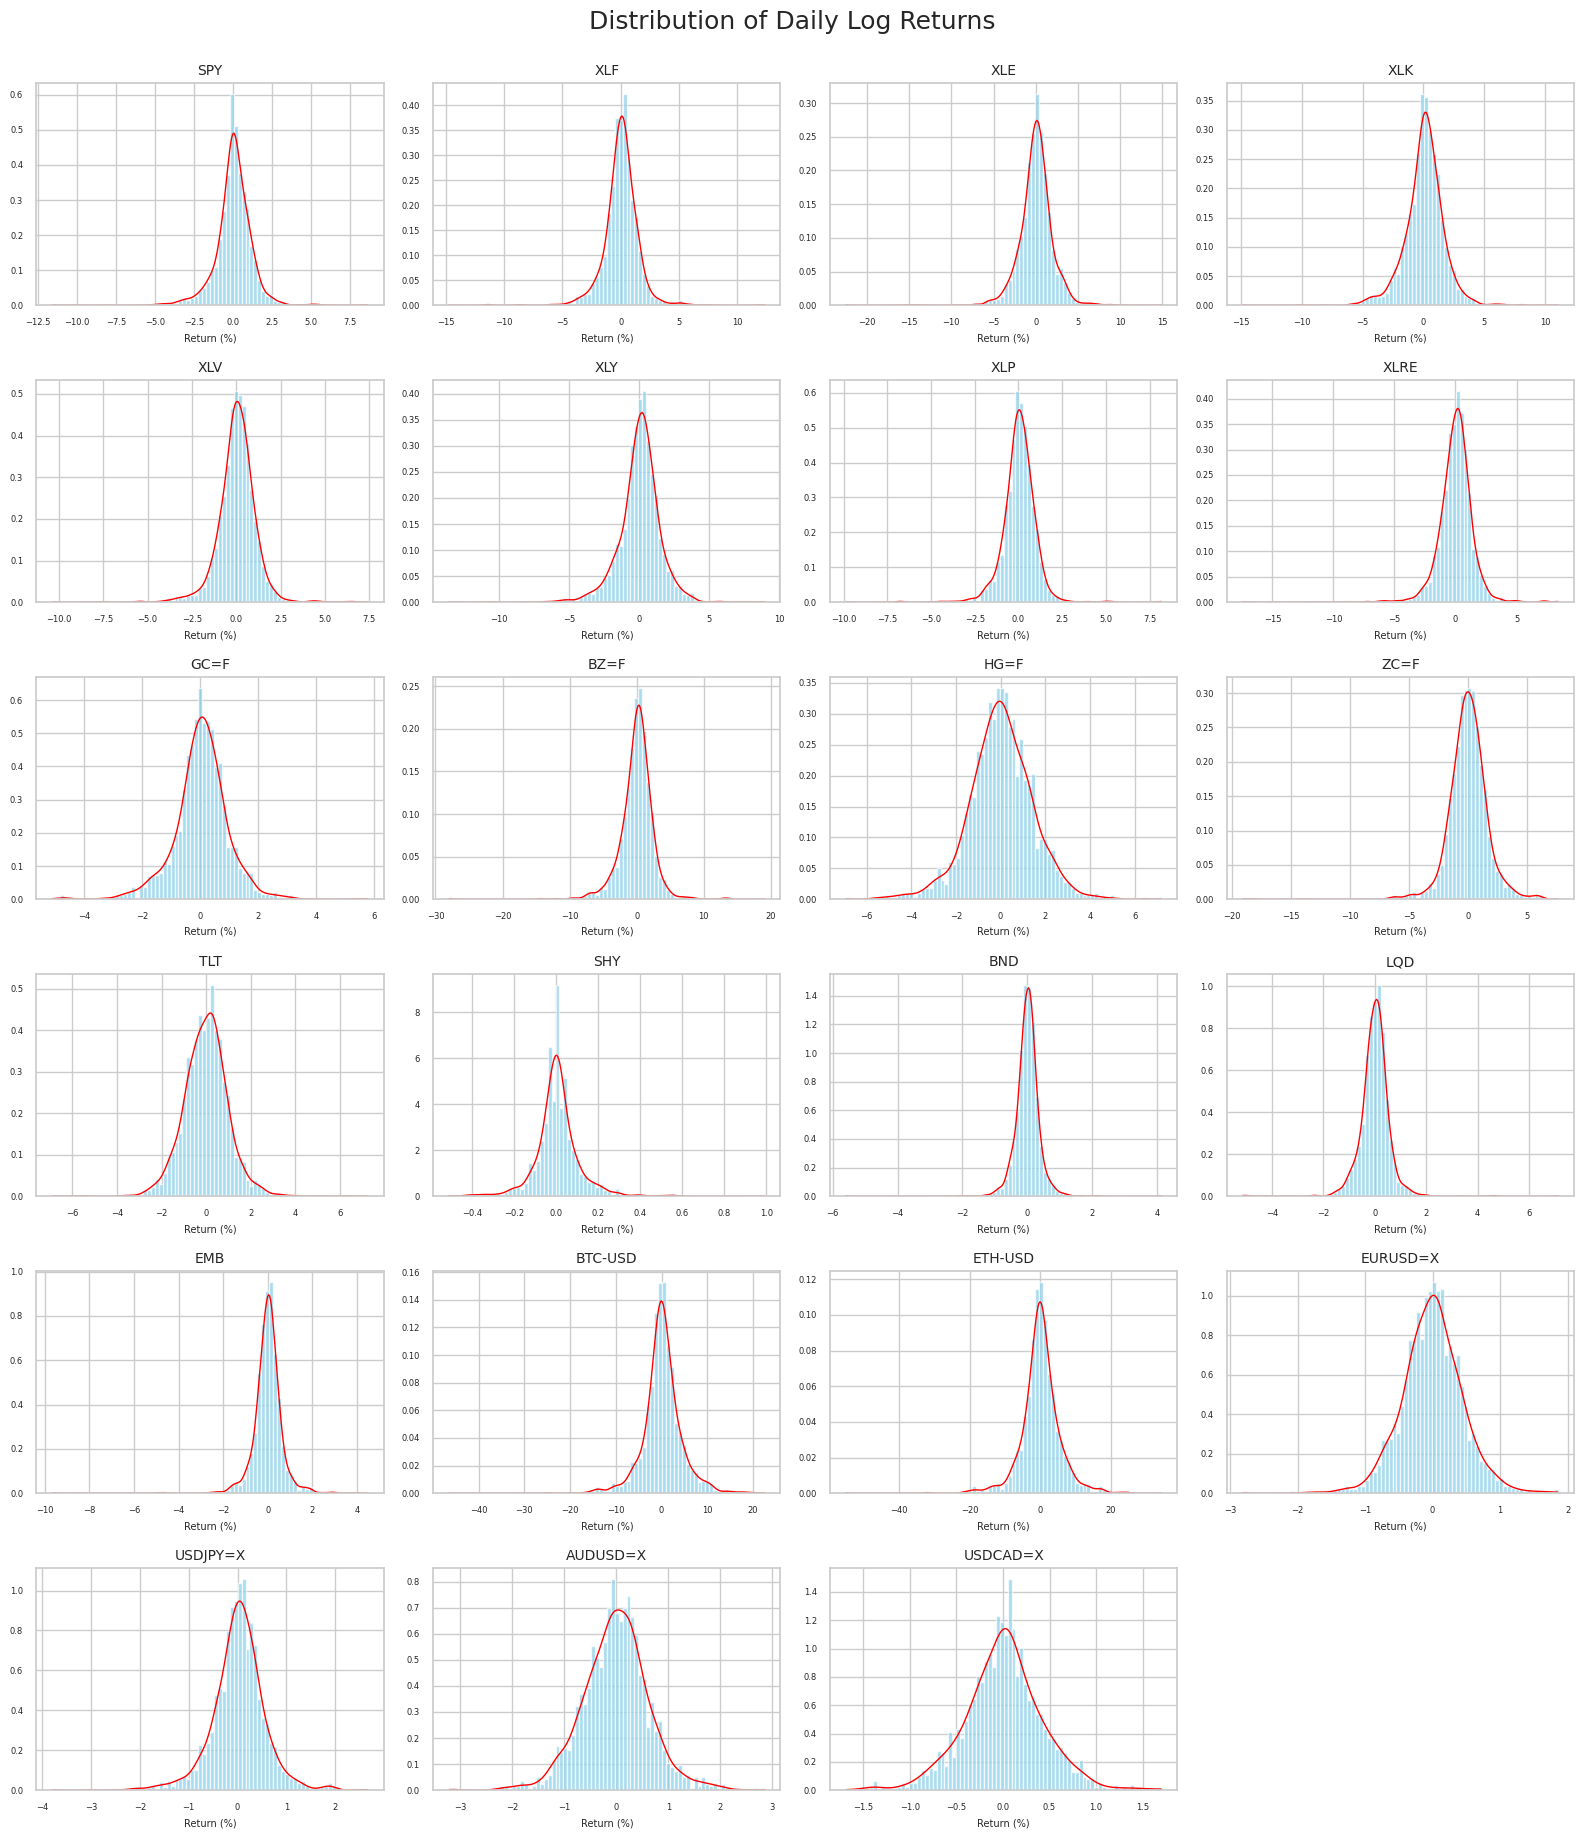

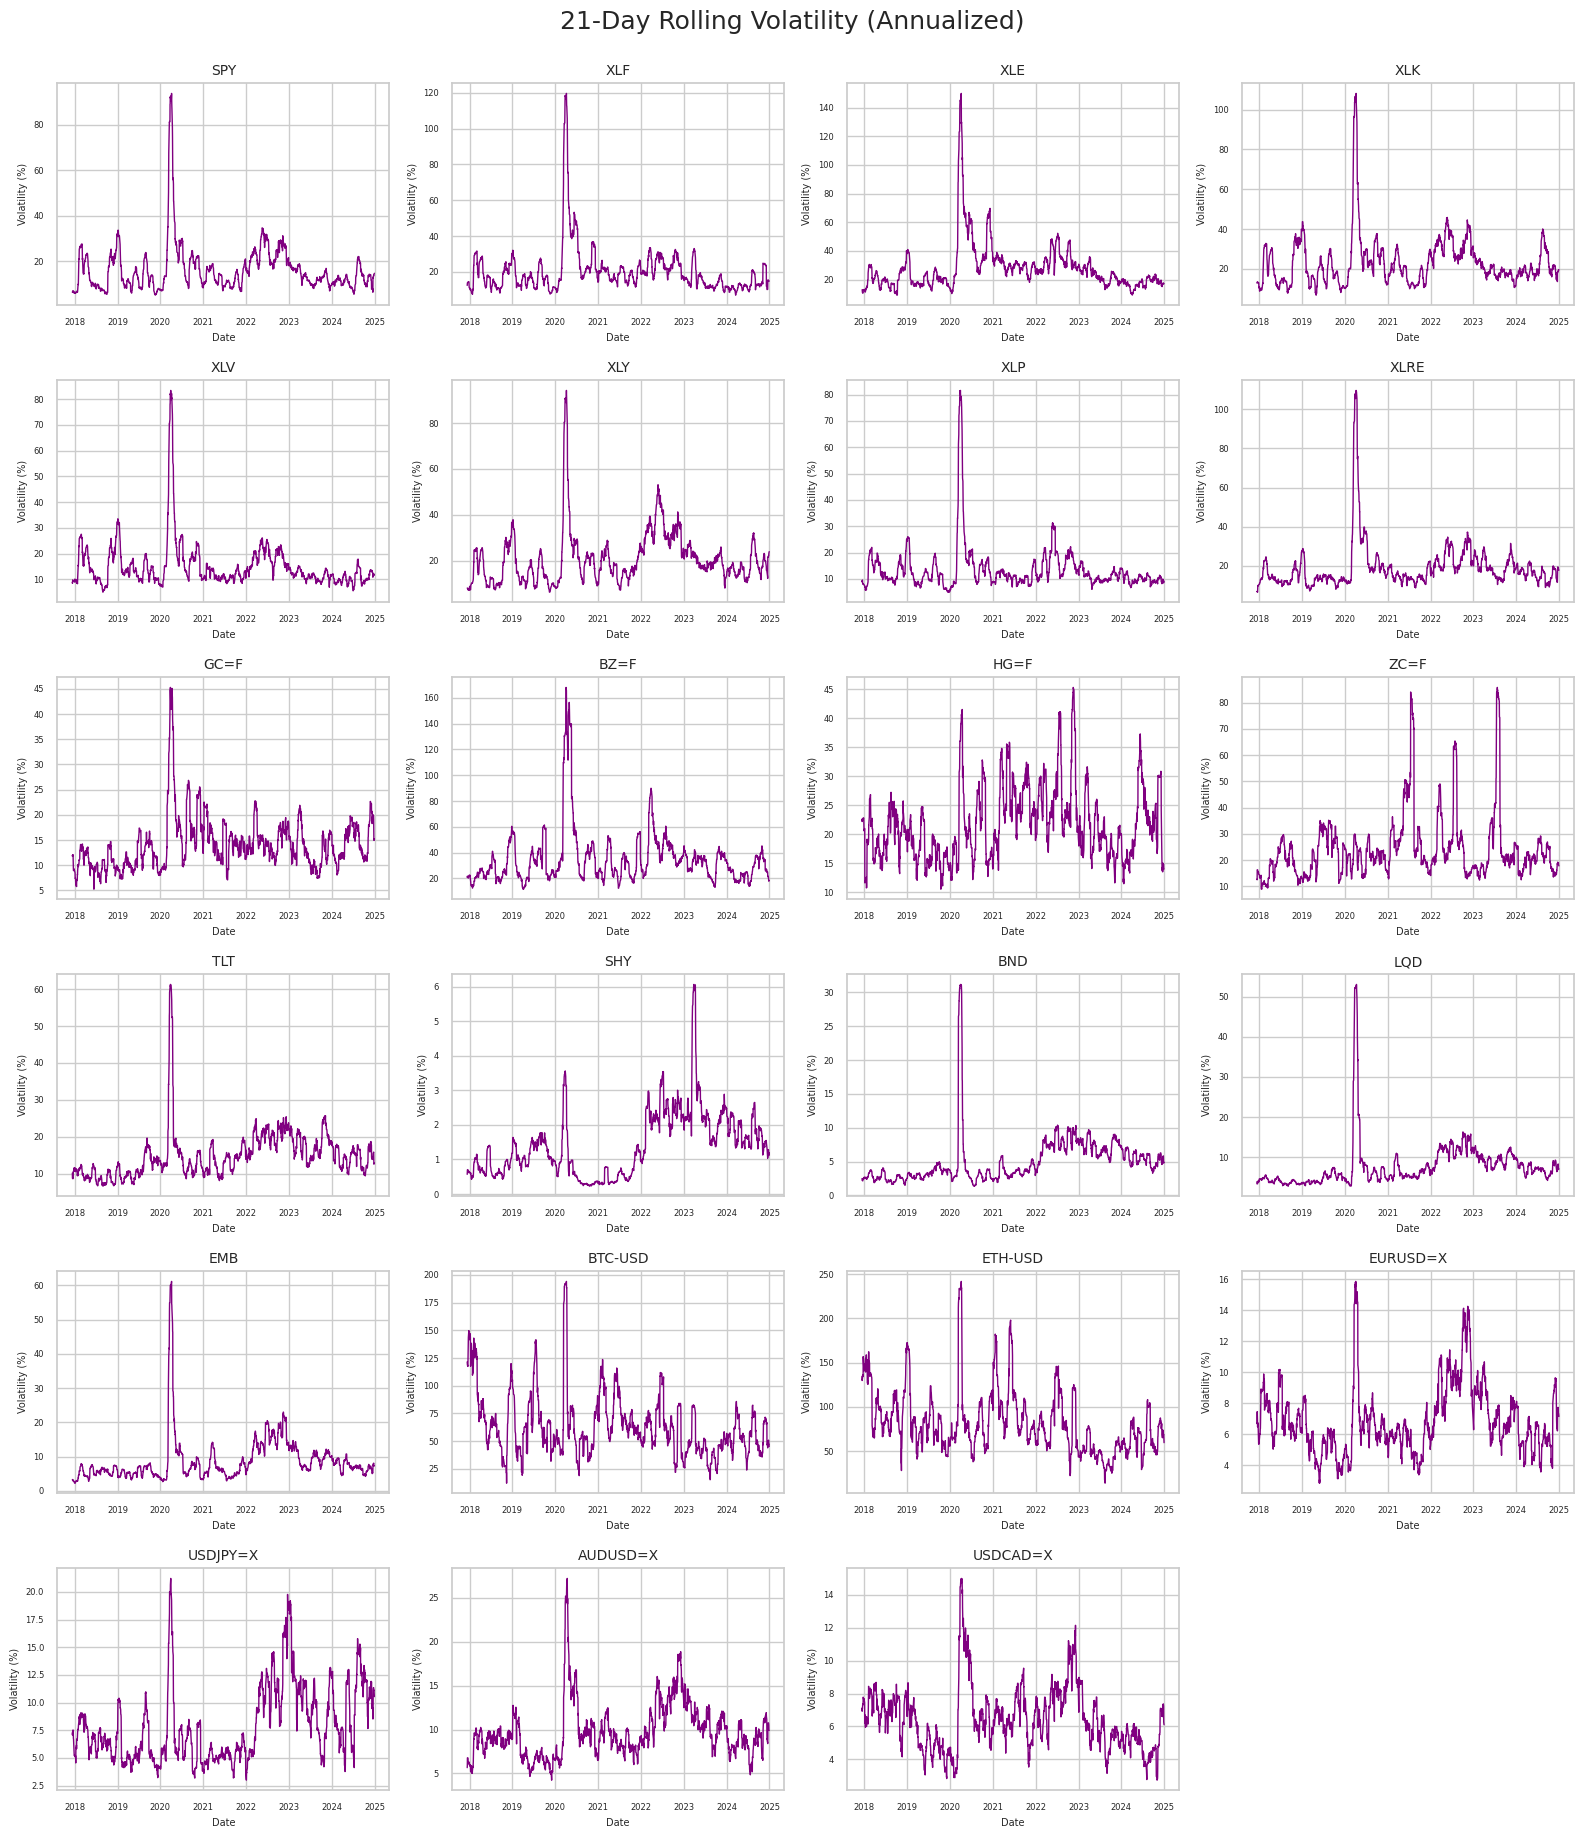


Descriptive Statistics (Daily Log Returns %):
           count  mean   std    min   25%   50%   75%    max  skew  kurtosis
SPY       1789.0  0.05  1.22 -11.59 -0.42  0.08  0.66   8.67 -0.82     12.68
XLF       1789.0  0.04  1.52 -14.74 -0.63  0.09  0.77  12.36 -0.59     15.02
XLE       1789.0  0.03  2.06 -22.49 -0.90  0.08  1.02  14.87 -0.93     15.34
XLK       1789.0  0.08  1.64 -14.87 -0.69  0.15  0.95  11.09 -0.44      7.89
XLV       1789.0  0.04  1.11 -10.38 -0.47  0.07  0.60   7.42 -0.47     10.79
XLY       1789.0  0.05  1.50 -13.55 -0.60  0.15  0.85   8.97 -0.77      7.76
XLP       1789.0  0.03  1.00  -9.87 -0.40  0.06  0.54   8.17 -0.56     15.93
XLRE      1789.0  0.02  1.42 -17.44 -0.63  0.09  0.73   8.42 -1.08     17.91
GC=F      1789.0  0.04  0.94  -5.11 -0.40  0.05  0.55   5.78 -0.27      4.05
BZ=F      1789.0  0.01  2.59 -27.98 -1.05  0.19  1.28  19.08 -1.37     19.63
HG=F      1789.0  0.02  1.42  -6.93 -0.82  0.01  0.91   7.20 -0.12      1.65
ZC=F      1789.0  0.02  1.71 

In [ ]:
# Set default seaborn style
sns.set(style="whitegrid")

# =======================================
# Step 1: Basic Asset Information
# =======================================
print("Total assets:", len(asset_data))
for symbol, df in asset_data.items():
    start_date = df.index.min().date()
    end_date = df.index.max().date()
    print(f"{symbol}: {start_date} to {end_date}, {len(df)} rows")

# =======================================
# Step 2: Descriptive Statistics (Close)
# =======================================

def extract_close_prices(asset_data):
    """Extracts a DataFrame of close prices from a dictionary of asset DataFrames."""
    close_dict = {}
    for symbol, df in asset_data.items():
        if isinstance(df.columns, pd.MultiIndex):
            col = ('Close', symbol)
        else:
            col = 'Close'

        if col in df.columns and not df[col].isnull().all():
            close_dict[symbol] = df[col]

    return pd.DataFrame(close_dict).dropna(how='any')

# Extract valid close prices
close_prices = extract_close_prices(asset_data)

# Compute descriptive statistics
desc_df = close_prices.describe().T.round(2)

print("\nDescriptive Statistics (Close):")
print(desc_df)

# =======================================
# Step 3: Daily Log Returns & Correlation Matrix
# =======================================

# Compute daily log returns
log_returns = np.log(close_prices / close_prices.shift(1)).dropna()

# Plot correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    log_returns.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Matrix of Daily Log Returns", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# =======================================
# Step 4: Distribution & Rolling Volatility
# =======================================

def plot_return_distributions_grid(log_returns, rows=6, cols=4):
    """Plot histogram and KDE of daily returns for each asset in a grid layout."""
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
    axes = axes.flatten()

    for idx, symbol in enumerate(log_returns.columns):
        if idx >= rows * cols:
            print(f"Only plotting first {rows * cols} assets.")
            break

        data = log_returns[symbol].dropna() * 100  # Convert to percentage
        ax = axes[idx]

        # Histogram
        ax.hist(data, bins=80, color='skyblue', alpha=0.7, density=True)

        # KDE
        kde = gaussian_kde(data)
        x_vals = np.linspace(data.min(), data.max(), 300)
        ax.plot(x_vals, kde(x_vals), color='red', linewidth=1)

        ax.set_title(symbol, fontsize=10)
        ax.set_xlabel("Return (%)", fontsize=7)
        ax.tick_params(axis='both', which='both', labelsize=6)
        ax.grid(True)

    # Remove unused axes
    for i in range(len(log_returns.columns), rows * cols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.suptitle("Distribution of Daily Log Returns", fontsize=18, y=1.02)
    plt.show()


def plot_rolling_volatility_grid(log_returns, rows=6, cols=4, window=21):
    """Plot 21-day rolling volatility of daily log returns."""
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
    axes = axes.flatten()

    for idx, symbol in enumerate(log_returns.columns):
        if idx >= rows * cols:
            print(f"Only plotting first {rows * cols} assets.")
            break

        vol = log_returns[symbol].rolling(window=window).std() * np.sqrt(252) * 100  # annualized volatility %
        ax = axes[idx]

        ax.plot(vol.index, vol, color='purple', linewidth=1)
        ax.set_title(f"{symbol}", fontsize=10)
        ax.set_xlabel("Date", fontsize=7)
        ax.set_ylabel("Volatility (%)", fontsize=7)
        ax.tick_params(axis='both', which='both', labelsize=6)
        ax.grid(True)

    for i in range(len(log_returns.columns), rows * cols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.suptitle("21-Day Rolling Volatility (Annualized)", fontsize=18, y=1.02)
    plt.show()

# ==== Call Plotting Functions ====
plot_return_distributions_grid(log_returns, rows=6, cols=4)
plot_rolling_volatility_grid(log_returns, rows=6, cols=4)

# =======================================
# Step 5: Descriptive Statistics of Daily Log Returns
# =======================================

# Convert log returns to percentage scale
log_returns_pct = log_returns * 100

# Base descriptive statistics
return_stats_df = log_returns_pct.describe().T

# Add skewness and kurtosis
return_stats_df["skew"] = log_returns_pct.skew()
return_stats_df["kurtosis"] = log_returns_pct.kurtosis()

# Round and display
return_stats_df = return_stats_df.round(2)

print("\nDescriptive Statistics (Daily Log Returns %):")
print(return_stats_df)



## VAR

### Parametric VAR

In [ ]:
# =======================================
# Type 1: Parametric VaR (1-Day, 95% Confidence Level)
# =======================================

# Define confidence level and Z-score
confidence_level = 0.95
z_score = norm.ppf(1 - confidence_level)  # left tail (negative side)

# Extract valid close prices
def extract_close_prices(asset_data):
    close_dict = {}
    for symbol, df in asset_data.items():
        col = ('Close', symbol) if isinstance(df.columns, pd.MultiIndex) else 'Close'
        if col in df.columns and not df[col].isnull().all():
            close_dict[symbol] = df[col]
    return pd.DataFrame(close_dict).dropna(how='any')

close_prices = extract_close_prices(asset_data)

# Compute daily log returns
log_returns = np.log(close_prices / close_prices.shift(1)).dropna()

# Calculate parametric VaR (%)
var_percent = -z_score * log_returns.std() * 100

# Convert to DataFrame and sort
var_df = var_percent.to_frame(name='1-Day Parametric VaR (%)')
var_df = var_df.sort_values(by='1-Day Parametric VaR (%)', ascending=False)

# Display result
print("\n1-Day Parametric VaR at 95% Confidence Level (in %):")
print(var_df)



1-Day Parametric VaR at 95% Confidence Level (in %):
          1-Day Parametric VaR (%)
ETH-USD                   9.272278
BTC-USD                   7.267667
BZ=F                      4.255134
XLE                       3.396181
ZC=F                      2.806683
XLK                       2.696717
XLF                       2.501619
XLY                       2.461111
HG=F                      2.341331
XLRE                      2.337329
SPY                       2.012961
XLV                       1.819035
TLT                       1.676050
XLP                       1.641811
GC=F                      1.546125
EMB                       1.155569
AUDUSD=X                  1.059579
LQD                       1.001026
USDJPY=X                  0.899567
EURUSD=X                  0.743890
USDCAD=X                  0.695255
BND                       0.634274
SHY                       0.176166


### Historical VAR

In [ ]:
# =======================================
# Type 2: Historical Simulation VaR (1-Day, 95% Confidence Level)
# =======================================

# Set confidence level and quantile
confidence_level = 0.95
quantile_level = 1 - confidence_level

# Compute historical VaR (in %)
hist_var = -log_returns.quantile(quantile_level, axis=0) * 100  # Flip sign to represent loss

# Convert to DataFrame and sort
hist_var_df = hist_var.to_frame(name='1-Day Historical VaR (%)')
hist_var_df = hist_var_df.sort_values(by='1-Day Historical VaR (%)', ascending=False)

# Display result
print("\n1-Day Historical VaR at 95% Confidence Level (in %):")
print(hist_var_df)



1-Day Historical VaR at 95% Confidence Level (in %):
          1-Day Historical VaR (%)
ETH-USD                   8.070588
BTC-USD                   6.452483
BZ=F                      3.914234
XLE                       3.046158
XLK                       2.550265
XLY                       2.373813
ZC=F                      2.329835
HG=F                      2.282801
XLF                       2.228750
XLRE                      2.003174
SPY                       1.863129
TLT                       1.624664
XLV                       1.582410
GC=F                      1.568093
XLP                       1.434066
AUDUSD=X                  1.068861
EMB                       0.946788
LQD                       0.882735
USDJPY=X                  0.854649
EURUSD=X                  0.732656
USDCAD=X                  0.694552
BND                       0.547262
SHY                       0.147478


### Monte Carlo Simulated VAR

A. Parametric Monte Carlo Simulation


1-Day Parametric Monte Carlo VaR at 95% Confidence Level (Normal Distribution, in %):
          1-Day Parametric MC VaR (%)
ETH-USD                      9.124936
BTC-USD                      7.176623
BZ=F                         4.279149
XLE                          3.364328
ZC=F                         2.787972
XLK                          2.622030
XLF                          2.451867
XLY                          2.411044
HG=F                         2.340553
XLRE                         2.310535
SPY                          1.958646
XLV                          1.797184
TLT                          1.694877
XLP                          1.605424
GC=F                         1.513361
EMB                          1.148745
AUDUSD=X                     1.070474
LQD                          0.992609
USDJPY=X                     0.882409
EURUSD=X                     0.750567
USDCAD=X                     0.689223
BND                          0.628649
SHY                          0.171034


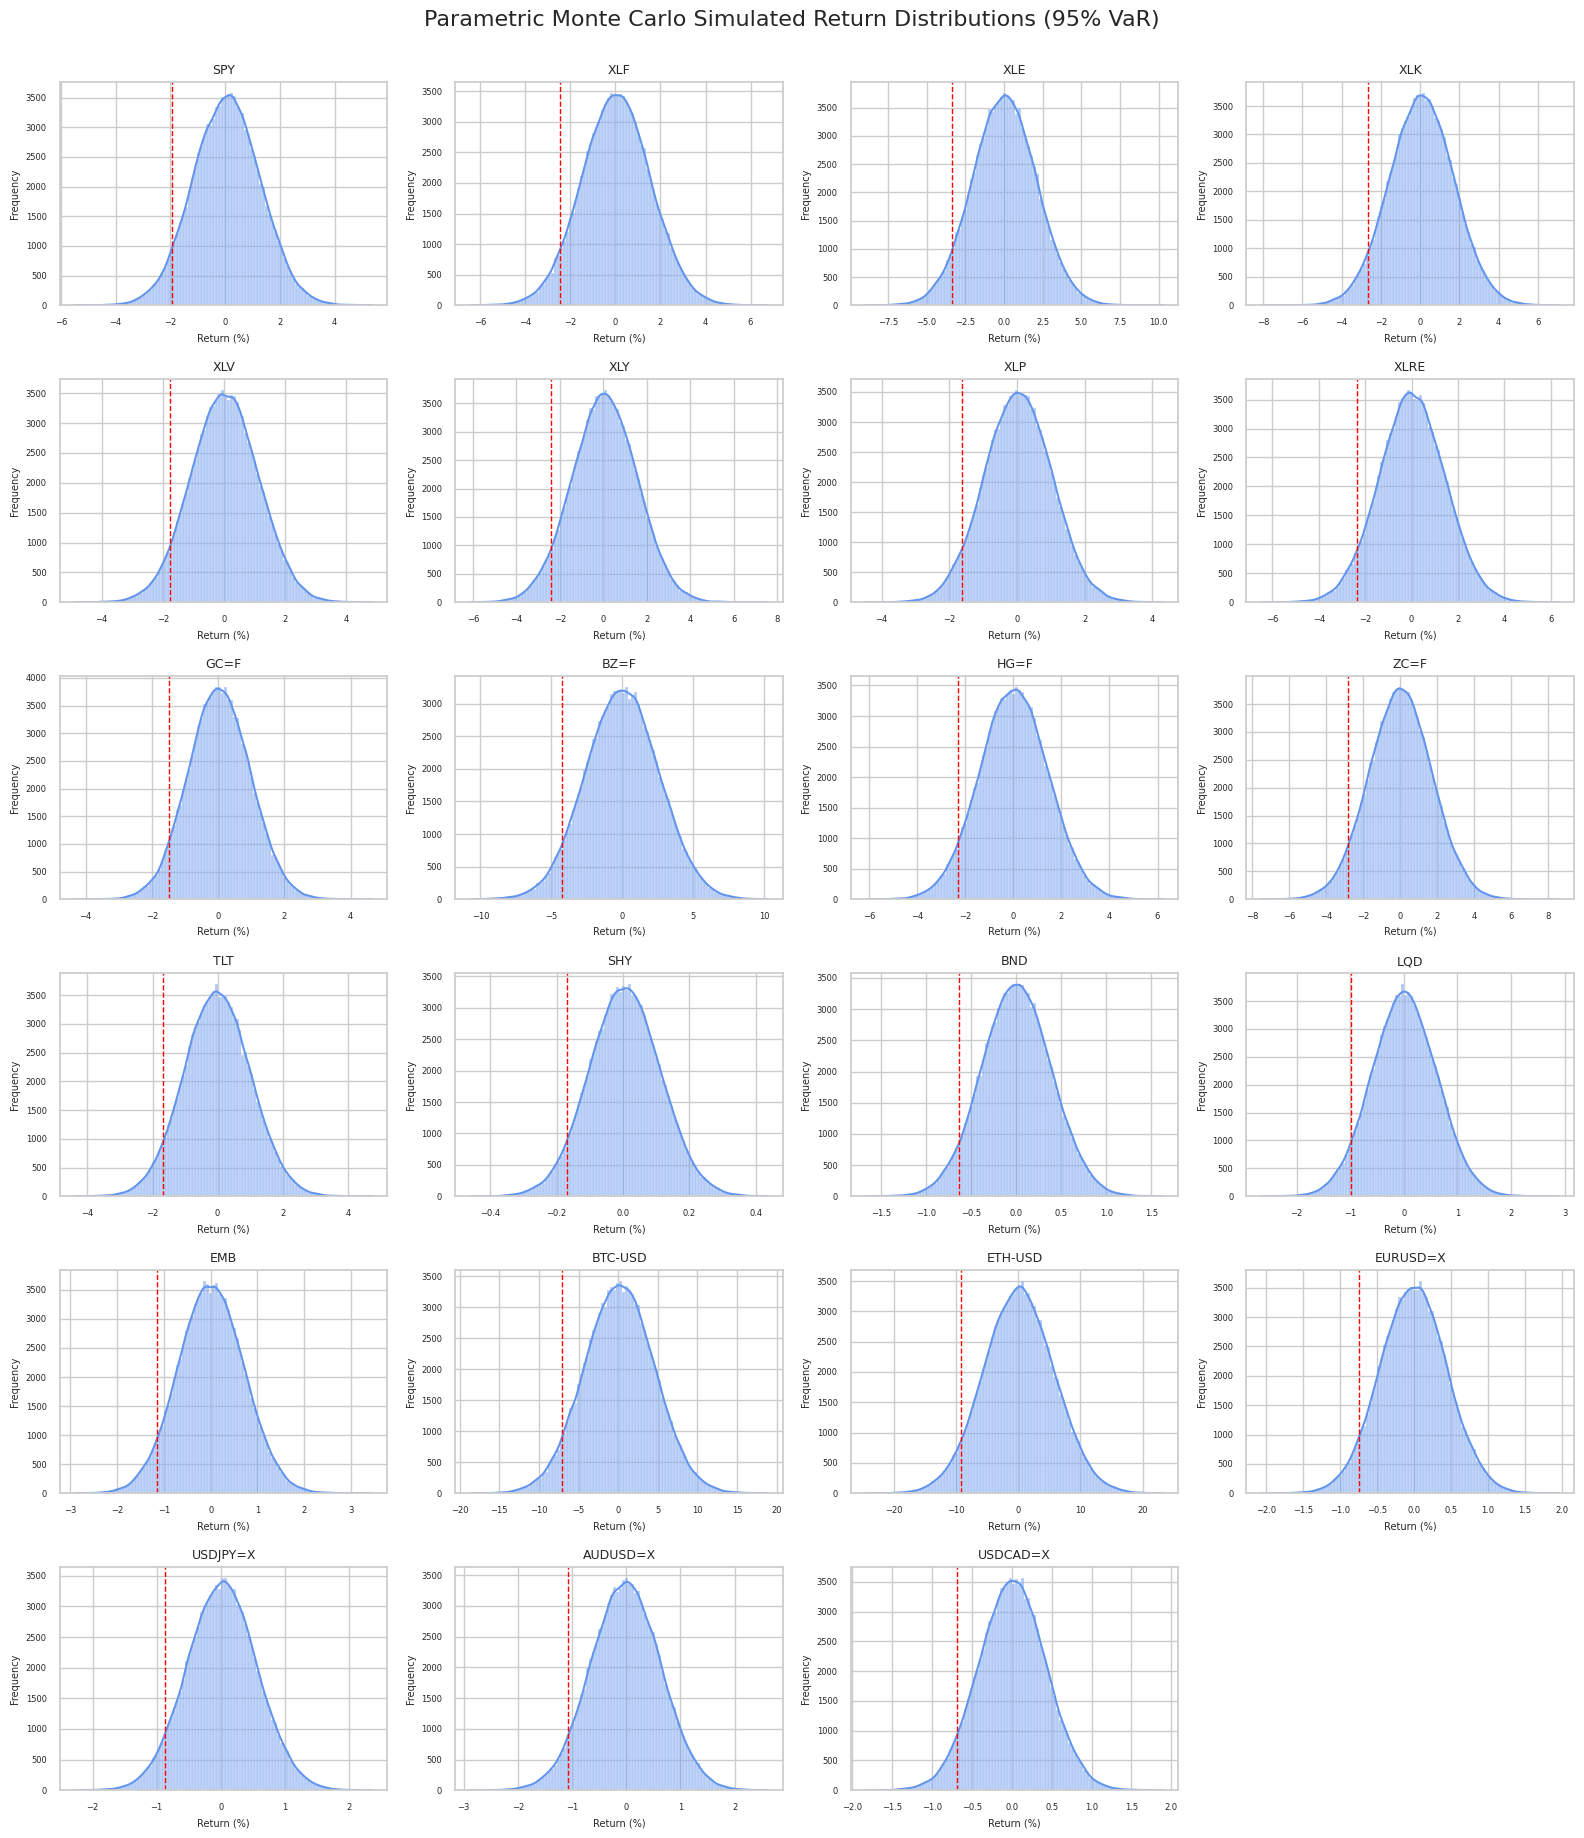

In [ ]:
# =======================================
# Type 3 Monte Carlo Simulation VaR (Parametric Normal, 1-Day, 95% Confidence Level)
# =======================================
np.random.seed(42)

# Parameters
confidence_level = 0.95
quantile_level = 1 - confidence_level
n_simulations = 100_000

# Compute Parametric Monte Carlo VaR
param_mc_var = {}

for symbol in log_returns.columns:
    returns = log_returns[symbol].dropna()

    # Estimate parameters from historical data
    mu = returns.mean()
    sigma = returns.std()

    # Simulate normal returns
    simulated_returns = np.random.normal(loc=mu, scale=sigma, size=n_simulations)

    # Calculate VaR at the desired quantile
    var = -np.percentile(simulated_returns, 100 * quantile_level) * 100  # in %
    param_mc_var[symbol] = var

# Format and sort result
param_monte_var_df = pd.DataFrame.from_dict(param_mc_var, orient='index', columns=['1-Day Parametric MC VaR (%)'])
param_monte_var_df = param_monte_var_df.sort_values(by='1-Day Parametric MC VaR (%)', ascending=False)

print("\n1-Day Parametric Monte Carlo VaR at 95% Confidence Level (Normal Distribution, in %):")
print(param_monte_var_df)
def plot_param_mc_var_grid(log_returns, confidence_level=0.95, n_simulations=100_000, rows=6, cols=4):
    """Plots histograms of simulated returns from normal distribution with VaR line."""
    quantile_level = 1 - confidence_level
    symbols = list(log_returns.columns)
    total_assets = len(symbols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
    axes = axes.flatten()

    for idx, symbol in enumerate(symbols):
        if idx >= rows * cols:
            print(f"Only plotting first {rows * cols} assets.")
            break

        returns = log_returns[symbol].dropna()
        mu = returns.mean()
        sigma = returns.std()
        simulated_returns = np.random.normal(loc=mu, scale=sigma, size=n_simulations)
        var_threshold = np.percentile(simulated_returns, 100 * quantile_level)

        ax = axes[idx]
        sns.histplot(simulated_returns * 100, bins=100, kde=True, color='cornflowerblue', ax=ax)

        ax.axvline(var_threshold * 100, color='red', linestyle='--', linewidth=1)
        ax.set_title(symbol, fontsize=9)
        ax.set_xlabel("Return (%)", fontsize=7)
        ax.set_ylabel("Frequency", fontsize=7)
        ax.tick_params(axis='both', which='both', labelsize=6)
        ax.grid(True)

    for i in range(total_assets, rows * cols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.suptitle("Parametric Monte Carlo Simulated Return Distributions (95% VaR)", fontsize=16, y=1.02)
    plt.show()

# Call the function
plot_param_mc_var_grid(log_returns, rows=6, cols=4)


B. Empirical Bootstrap Monte Carlo Simulation


1-Day Monte Carlo VaR at 95% Confidence Level (Empirical Bootstrap, in %):
          1-Day Monte Carlo VaR (%)
ETH-USD                    8.076942
BTC-USD                    6.463657
BZ=F                       3.908926
XLE                        3.065152
XLK                        2.554083
XLY                        2.374825
ZC=F                       2.331437
HG=F                       2.273231
XLF                        2.227736
XLRE                       2.077776
SPY                        1.863726
TLT                        1.626709
GC=F                       1.578352
XLV                        1.568877
XLP                        1.437888
AUDUSD=X                   1.080790
EMB                        0.934701
LQD                        0.886434
USDJPY=X                   0.853199
EURUSD=X                   0.733541
USDCAD=X                   0.695403
BND                        0.549187
SHY                        0.147735


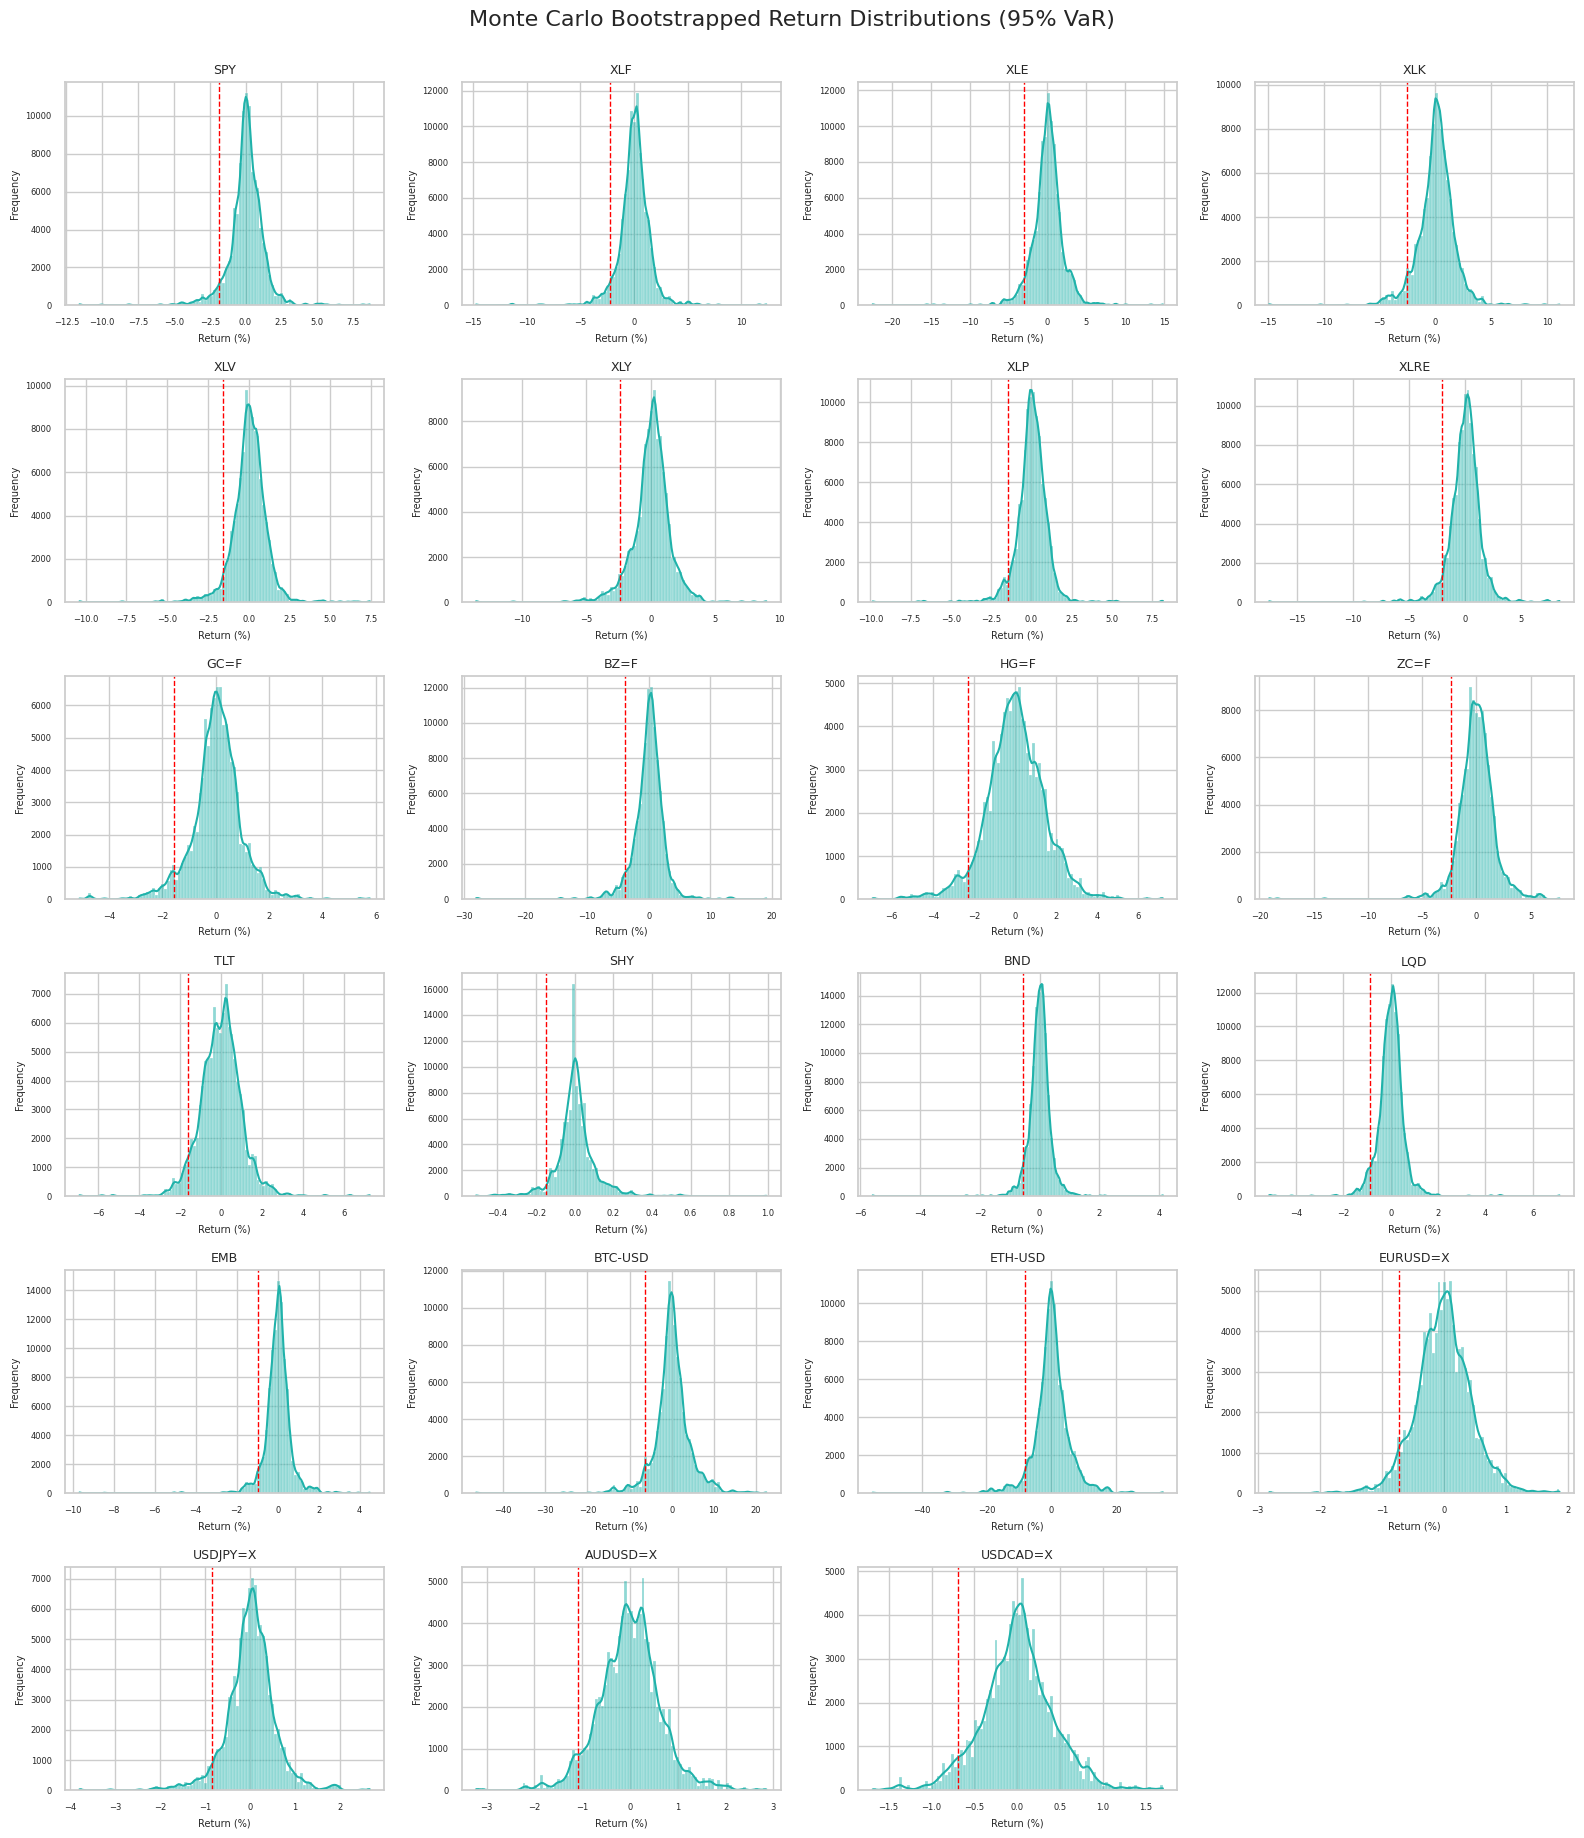

In [ ]:
# =======================================
# Type 3 Monte Carlo Simulation VaR (Empirical Bootstrap, 1-Day, 95% Confidence Level)
# =======================================
np.random.seed(69)

# Parameters
confidence_level = 0.95
quantile_level = 1 - confidence_level
n_simulations = 100_000

# Compute Monte Carlo VaR via empirical bootstrapping
monte_carlo_var = {}

for symbol in log_returns.columns:
    returns = log_returns[symbol].dropna()

    # Simulate by bootstrapping from historical returns
    simulated_returns = np.random.choice(returns, size=n_simulations, replace=True)

    # Calculate 5% quantile and convert to positive loss %
    var = -np.percentile(simulated_returns, 100 * quantile_level) * 100
    monte_carlo_var[symbol] = var

# Format and sort result
monte_var_df = pd.DataFrame.from_dict(monte_carlo_var, orient='index', columns=['1-Day Monte Carlo VaR (%)'])
monte_var_df = monte_var_df.sort_values(by='1-Day Monte Carlo VaR (%)', ascending=False)

print("\n1-Day Monte Carlo VaR at 95% Confidence Level (Empirical Bootstrap, in %):")
print(monte_var_df)

# =======================================
# Visualization: Monte Carlo (Bootstrapped) Return Distributions
# =======================================

def plot_monte_carlo_var_grid(log_returns, confidence_level=0.95, n_simulations=100_000, rows=6, cols=4):
    """Plots Monte Carlo bootstrapped return histograms with VaR threshold per asset."""
    quantile_level = 1 - confidence_level
    symbols = list(log_returns.columns)
    total_assets = len(symbols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
    axes = axes.flatten()

    for idx, symbol in enumerate(symbols):
        if idx >= rows * cols:
            print(f"Only plotting first {rows * cols} assets.")
            break

        returns = log_returns[symbol].dropna()
        simulated_returns = np.random.choice(returns, size=n_simulations, replace=True)
        var_threshold = np.percentile(simulated_returns, 100 * quantile_level)

        ax = axes[idx]
        sns.histplot(simulated_returns * 100, bins=100, kde=True, color='lightseagreen', ax=ax)

        # Add VaR threshold line
        ax.axvline(var_threshold * 100, color='red', linestyle='--', linewidth=1)
        ax.set_title(symbol, fontsize=9)
        ax.set_xlabel("Return (%)", fontsize=7)
        ax.set_ylabel("Frequency", fontsize=7)
        ax.tick_params(axis='both', which='both', labelsize=6)
        ax.grid(True)

    # Remove unused subplots
    for i in range(total_assets, rows * cols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.suptitle("Monte Carlo Bootstrapped Return Distributions (95% VaR)", fontsize=16, y=1.02)
    plt.show()

# Plot histograms
plot_monte_carlo_var_grid(log_returns, rows=6, cols=4)



### EVT based VAR

In [ ]:
from scipy.stats import genpareto

# Parameters
confidence_level = 0.95
min_exceedances = 30
evt_var_results = {}

for symbol in log_returns.columns:
    returns = log_returns[symbol].dropna()
    losses = -returns  # Convert to losses for POT

    best_threshold_q = None
    best_exceedances = None

    # Iterate over quantiles to find suitable threshold
    for threshold_q in np.linspace(0.85, 0.995, 20):  # Finer granularity up to 99.5%
        threshold = losses.quantile(threshold_q)
        exceedances = losses[losses > threshold] - threshold

        if len(exceedances) >= min_exceedances:
            best_threshold_q = threshold_q
            best_exceedances = exceedances
            break

    if best_exceedances is None:
        print(f"⚠️ Not enough exceedances to fit GPD for {symbol}. Skipping.")
        evt_var_results[symbol] = np.nan
        continue

    try:
        # Fit Generalized Pareto Distribution (GPD)
        c, loc, scale = genpareto.fit(best_exceedances, floc=0)
        threshold = losses.quantile(best_threshold_q)

        p = 1 - confidence_level
        xi = c
        beta = scale

        # EVT VaR extrapolation formula
        if xi != 0:
            var_evt = threshold + (beta / xi) * ((p / (1 - best_threshold_q)) ** (-xi) - 1)
        else:
            var_evt = threshold - beta * np.log(p / (1 - best_threshold_q))

        evt_var_results[symbol] = var_evt * 100  # Convert to percentage

    except Exception as e:
        print(f"⚠️ GPD fitting failed for {symbol}: {e}")
        evt_var_results[symbol] = np.nan

# Format into DataFrame
evt_var_df = pd.DataFrame.from_dict(evt_var_results, orient='index', columns=['1-Day EVT VaR (%)'])
evt_var_df = evt_var_df.sort_values(by='1-Day EVT VaR (%)', ascending=False)

# Display result
print("\n1-Day EVT VaR at 95% Confidence Level (in %):")
print(evt_var_df.round(2))



1-Day EVT VaR at 95% Confidence Level (in %):
          1-Day EVT VaR (%)
ETH-USD                8.36
BTC-USD                6.58
BZ=F                   3.90
XLE                    3.04
XLK                    2.57
XLY                    2.40
ZC=F                   2.35
HG=F                   2.27
XLF                    2.21
XLRE                   2.04
SPY                    1.87
XLV                    1.61
TLT                    1.59
GC=F                   1.52
XLP                    1.40
AUDUSD=X               1.05
EMB                    0.94
USDJPY=X               0.86
LQD                    0.85
EURUSD=X               0.73
USDCAD=X               0.69
BND                    0.55
SHY                    0.15


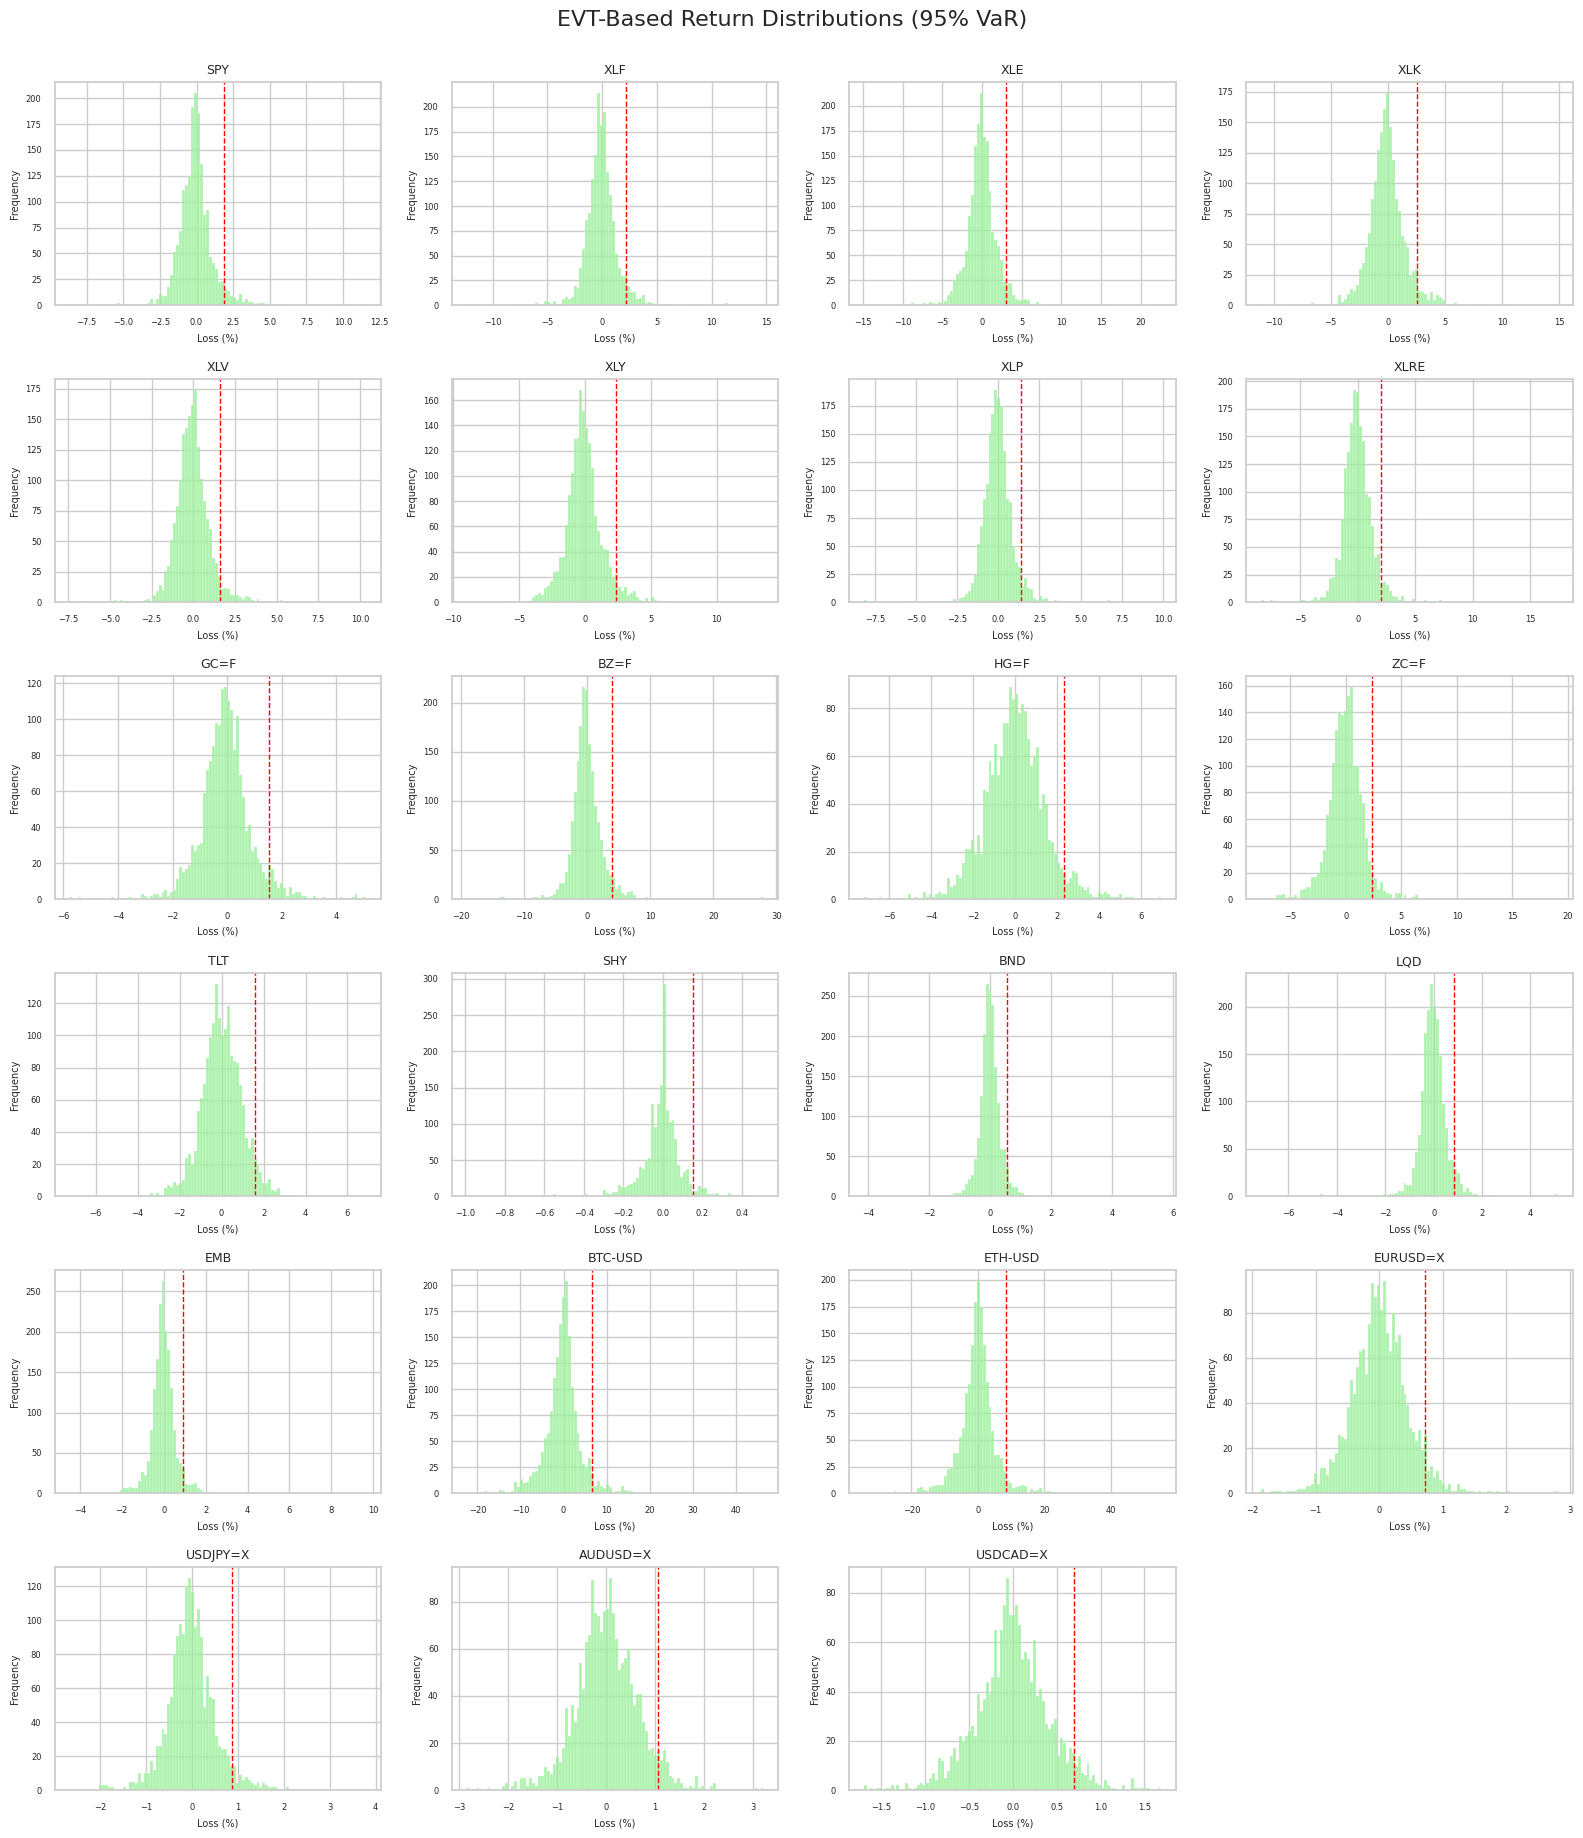

In [ ]:
# =======================================
# Visualization: EVT Return Distributions with Fitted GPD
# =======================================

def plot_evt_var_grid(log_returns, confidence_level=0.95, threshold_quantile=0.90, rows=6, cols=4):
    symbols = list(log_returns.columns)
    total_assets = len(symbols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
    axes = axes.flatten()

    for idx, symbol in enumerate(symbols):
        if idx >= rows * cols:
            print(f"Only plotting first {rows * cols} assets.")
            break

        returns = log_returns[symbol].dropna()
        losses = -returns  # Convert to losses for POT
        threshold = losses.quantile(threshold_quantile)
        exceedances = losses[losses > threshold] - threshold

        if len(exceedances) < 30:
            print(f"⚠️ Not enough exceedances to fit GPD for {symbol}")
            continue

        try:
            # Fit GPD to exceedances
            c, loc, scale = genpareto.fit(exceedances, floc=0)

            # Estimate VaR using EVT
            p = 1 - confidence_level
            tail_prob = p / (1 - threshold_quantile)

            if c != 0:
                var_evt = threshold + (scale / c) * ((tail_prob) ** (-c) - 1)
            else:
                var_evt = threshold - scale * np.log(tail_prob)

            var_evt_plot = var_evt * 100  # Convert to percentage for plotting

            ax = axes[idx]
            sns.histplot(losses * 100, bins=100, kde=False, color='lightgreen', ax=ax)

            # Add EVT VaR line
            ax.axvline(var_evt_plot, color='red', linestyle='--', linewidth=1)
            ax.set_title(symbol, fontsize=9)
            ax.set_xlabel("Loss (%)", fontsize=7)
            ax.set_ylabel("Frequency", fontsize=7)
            ax.tick_params(axis='both', which='both', labelsize=6)
            ax.grid(True)

        except Exception as e:
            print(f"⚠️ Failed EVT plot for {symbol}: {e}")
            continue

    # Remove unused subplots
    for i in range(total_assets, rows * cols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.suptitle("EVT-Based Return Distributions (95% VaR)", fontsize=16, y=1.02)
    plt.show()

# ✅ Plot EVT VaR histograms
plot_evt_var_grid(log_returns, rows=6, cols=4)


### Comparisons of VAR Across Models

In [ ]:
# =======================================
# Combine All VaR Results into One Table (Including Parametric MC)
# =======================================

# Align by index to ensure consistent asset ordering
combined_var_df = pd.concat([
    var_df.rename(columns={'1-Day Parametric VaR (%)': 'Parametric (95%)'}),
    hist_var_df.rename(columns={'1-Day Historical VaR (%)': 'Historical (95%)'}),
    monte_var_df.rename(columns={'1-Day Monte Carlo VaR (%)': 'MC Bootstrap (95%)'}),
    param_monte_var_df.rename(columns={'1-Day Parametric MC VaR (%)': 'MC Parametric (95%)'}),
    evt_var_df.rename(columns={'1-Day EVT VaR (%)': 'EVT (95%)'})
], axis=1)

# Optionally sort by one of the methods, e.g., EVT
combined_var_df = combined_var_df.sort_values(by='EVT (95%)', ascending=False)

# Display the comparison table
print("\nVaR Comparison Across Models (in %):")
print(combined_var_df.round(2))



VaR Comparison Across Models (in %):
          Parametric (95%)  Historical (95%)  MC Bootstrap (95%)  \
ETH-USD               9.27              8.07                8.08   
BTC-USD               7.27              6.45                6.46   
BZ=F                  4.26              3.91                3.91   
XLE                   3.40              3.05                3.07   
XLK                   2.70              2.55                2.55   
XLY                   2.46              2.37                2.37   
ZC=F                  2.81              2.33                2.33   
HG=F                  2.34              2.28                2.27   
XLF                   2.50              2.23                2.23   
XLRE                  2.34              2.00                2.08   
SPY                   2.01              1.86                1.86   
XLV                   1.82              1.58                1.57   
TLT                   1.68              1.62                1.63   
GC=F      

## Expected Shortfall

### Parametric Expected Shortfall

In [ ]:
# =======================================
# Type 1: Parametric Expected Shortfall (1-Day, 95% Confidence Level)
# =======================================

# Define confidence level and Z-score
confidence_level = 0.95
z_score = norm.ppf(1 - confidence_level)  # left tail (negative side)

# Extract valid close prices
def extract_close_prices(asset_data):
    close_dict = {}
    for symbol, df in asset_data.items():
        col = ('Close', symbol) if isinstance(df.columns, pd.MultiIndex) else 'Close'
        if col in df.columns and not df[col].isnull().all():
            close_dict[symbol] = df[col]
    return pd.DataFrame(close_dict).dropna(how='any')

close_prices = extract_close_prices(asset_data)

# Compute daily log returns
log_returns = np.log(close_prices / close_prices.shift(1)).dropna()

# Calculate parametric Expected Shortfall (%)
# Formula: ES = (σ * φ(z)) / (1 - α)
phi_z = norm.pdf(z_score)
es_percent = -(log_returns.std() * phi_z / (1 - confidence_level)) * 100

# Convert to DataFrame and sort
es_df = es_percent.to_frame(name='1-Day Parametric Expected Shortfall (%)')*-1
es_df = es_df.sort_values(by='1-Day Parametric Expected Shortfall (%)', ascending=False)

# Display result
print("\n1-Day Parametric Expected Shortfall at 95% Confidence Level (in %):")
print(es_df)



1-Day Parametric Expected Shortfall at 95% Confidence Level (in %):
          1-Day Parametric Expected Shortfall (%)
ETH-USD                                 11.627811
BTC-USD                                  9.113948
BZ=F                                     5.336110
XLE                                      4.258948
ZC=F                                     3.519693
XLK                                      3.381792
XLF                                      3.137131
XLY                                      3.086333
HG=F                                     2.936124
XLRE                                     2.931105
SPY                                      2.524334
XLV                                      2.281143
TLT                                      2.101835
XLP                                      2.058898
GC=F                                     1.938904
EMB                                      1.449130
AUDUSD=X                                 1.328755
LQD                            

### Historical Expected Shortfall

In [ ]:
# =======================================
# Type 2: Historical Simulation Expected Shortfall (1-Day, 95% Confidence Level)
# =======================================

# Set confidence level and quantile
confidence_level = 0.95
quantile_level = 1 - confidence_level  # e.g., 0.01 for 95% confidence

# Compute historical Expected Shortfall (in %)
def compute_historical_es(returns, quantile_level):
    es_dict = {}
    for col in returns.columns:
        sorted_returns = returns[col].sort_values()
        threshold = sorted_returns.quantile(quantile_level)
        tail_losses = sorted_returns[sorted_returns <= threshold]
        es = -tail_losses.mean() * 100  # Flip sign to represent loss
        es_dict[col] = es
    return pd.Series(es_dict)

hist_es = compute_historical_es(log_returns, quantile_level)

# Convert to DataFrame and sort
hist_es_df = hist_es.to_frame(name='1-Day Historical Expected Shortfall (%)')
hist_es_df = hist_es_df.sort_values(by='1-Day Historical Expected Shortfall (%)', ascending=False)

# Display result
print("\n1-Day Historical Expected Shortfall at 95% Confidence Level (in %):")
print(hist_es_df)



1-Day Historical Expected Shortfall at 95% Confidence Level (in %):
          1-Day Historical Expected Shortfall (%)
ETH-USD                                 13.645101
BTC-USD                                 10.532895
BZ=F                                     6.422095
XLE                                      4.800971
ZC=F                                     3.973839
XLK                                      3.871860
XLY                                      3.668726
XLF                                      3.612504
XLRE                                     3.371486
HG=F                                     3.266478
SPY                                      3.048174
XLV                                      2.649608
XLP                                      2.379821
GC=F                                     2.235046
TLT                                      2.206525
EMB                                      1.668480
AUDUSD=X                                 1.427681
LQD                            

### Monte Carlo Simulated Expected Shortfall

A. Parametric Monte Carlo Simulation

In [ ]:
# =======================================
# Parametric Monte Carlo Expected Shortfall (1-Day, 95% Confidence Level)
# =======================================
np.random.seed(42)
param_monte_es_results = {}

for symbol in log_returns.columns:
    mu = log_returns[symbol].mean()
    sigma = log_returns[symbol].std()

    # Simulate returns
    simulated_returns = np.random.normal(mu, sigma, size=100000)

    # Sort simulated returns
    sorted_returns = np.sort(simulated_returns)

    # Determine 5% cutoff index
    cutoff_index = int(0.05 * len(sorted_returns))

    # Expected Shortfall: average of the worst 5%
    es_param_mc = -np.mean(sorted_returns[:cutoff_index])

    param_monte_es_results[symbol] = es_param_mc * 100  # In percentage

# Format result
param_monte_es_df = pd.DataFrame.from_dict(param_monte_es_results, orient='index', columns=['1-Day Parametric MC ES (%)'])
param_monte_es_df = param_monte_es_df.sort_values(by='1-Day Parametric MC ES (%)', ascending=False)

print("\n1-Day Parametric Monte Carlo Expected Shortfall at 95% Confidence Level (in %):")
print(param_monte_es_df.round(2))



1-Day Parametric Monte Carlo Expected Shortfall at 95% Confidence Level (in %):
          1-Day Parametric MC ES (%)
ETH-USD                        11.47
BTC-USD                         9.02
BZ=F                            5.34
XLE                             4.24
ZC=F                            3.51
XLK                             3.32
XLF                             3.09
XLY                             3.03
HG=F                            2.94
XLRE                            2.91
SPY                             2.47
XLV                             2.25
TLT                             2.12
XLP                             2.02
GC=F                            1.91
EMB                             1.44
AUDUSD=X                        1.34
LQD                             1.24
USDJPY=X                        1.11
EURUSD=X                        0.94
USDCAD=X                        0.86
BND                             0.79
SHY                             0.22


B. Parametric Monte Carlo Simulation ES

In [ ]:
# =======================================
# Historical Bootstrap Monte Carlo Expected Shortfall (1-Day, 95% Confidence Level)
# =======================================
np.random.seed(42)
monte_es_results = {}

for symbol in log_returns.columns:
    sample_returns = log_returns[symbol].dropna()

    # Bootstrap resampling (with replacement)
    bootstrap_returns = np.random.choice(sample_returns, size=100000, replace=True)

    # Sort the returns
    sorted_returns = np.sort(bootstrap_returns)

    # 5% quantile
    cutoff_index = int(0.05 * len(sorted_returns))

    # Expected Shortfall = average of the worst 5%
    es_bootstrap = -np.mean(sorted_returns[:cutoff_index])

    monte_es_results[symbol] = es_bootstrap * 100  # As percentage

# Format result
monte_es_df = pd.DataFrame.from_dict(monte_es_results, orient='index', columns=['1-Day MC Bootstrap ES (%)'])
monte_es_df = monte_es_df.sort_values(by='1-Day MC Bootstrap ES (%)', ascending=False)

print("\n1-Day Historical Bootstrap Monte Carlo Expected Shortfall at 95% Confidence Level (in %):")
print(monte_es_df.round(2))



1-Day Historical Bootstrap Monte Carlo Expected Shortfall at 95% Confidence Level (in %):
          1-Day MC Bootstrap ES (%)
ETH-USD                       13.74
BTC-USD                       10.48
BZ=F                           6.50
XLE                            4.85
ZC=F                           4.01
XLK                            3.92
XLY                            3.65
XLF                            3.65
XLRE                           3.36
HG=F                           3.28
SPY                            3.04
XLV                            2.65
XLP                            2.38
TLT                            2.21
GC=F                           2.21
EMB                            1.68
AUDUSD=X                       1.44
LQD                            1.39
USDJPY=X                       1.33
EURUSD=X                       1.00
USDCAD=X                       0.92
BND                            0.87
SHY                            0.24


### EVT based ES

In [ ]:
# =======================================
# Type 4: Extreme Value Theory ES (1-Day, 95% Confidence Level)
# =======================================
from scipy.stats import genpareto

# Parameters
confidence_level = 0.95
min_exceedances = 60  # Minimum number of exceedances to fit GPD
evt_es_results = {}

for symbol in log_returns.columns:
    returns = log_returns[symbol].dropna()
    losses = -returns  # Convert to losses for POT

    # Try different thresholds from 0.85 to 0.99
    found = False
    for threshold_q in np.linspace(0.85, 0.99, 15):  # 15 steps between 85% and 99%
        threshold = losses.quantile(threshold_q)
        exceedances = losses[losses > threshold] - threshold

        if len(exceedances) >= min_exceedances:
            found = True
            break

    if not found:
        print(f"⚠️ Not enough exceedances to fit GPD for {symbol} even with lower threshold.")
        evt_es_results[symbol] = np.nan
        continue

    try:
        # Fit GPD
        c, loc, scale = genpareto.fit(exceedances, floc=0)

        p = 1 - confidence_level
        beta = scale
        xi = c

        # EVT Expected Shortfall formula
        tail_prob = p / (1 - threshold_q)

        if xi < 1:
            if xi != 0:
                var_evt = threshold + (beta / xi) * (tail_prob ** (-xi) - 1)
                es_evt = (var_evt + (beta - xi * threshold) / (1 - xi))
            else:
                var_evt = threshold - beta * np.log(tail_prob)
                es_evt = var_evt + beta
            evt_es_results[symbol] = es_evt * 100  # As percentage
        else:
            print(f"⚠️ Shape parameter xi >= 1 for {symbol}, ES is undefined.")
            evt_es_results[symbol] = np.nan

    except Exception as e:
        print(f"⚠️ GPD fitting failed for {symbol}: {e}")
        evt_es_results[symbol] = np.nan

# Format result
evt_es_df = pd.DataFrame.from_dict(evt_es_results, orient='index', columns=['1-Day EVT ES (%)'])
evt_es_df = evt_es_df.sort_values(by='1-Day EVT ES (%)', ascending=False)

print("\n1-Day EVT Expected Shortfall at 95% Confidence Level (in %):")
print(evt_es_df.round(2))



1-Day EVT Expected Shortfall at 95% Confidence Level (in %):
          1-Day EVT ES (%)
ETH-USD              11.82
BTC-USD               9.51
BZ=F                  5.33
XLE                   4.09
XLK                   3.58
XLY                   3.41
HG=F                  3.13
XLF                   3.07
ZC=F                  2.86
SPY                   2.77
XLRE                  2.68
GC=F                  2.22
XLV                   2.16
TLT                   2.11
XLP                   1.82
AUDUSD=X              1.40
EMB                   1.28
USDJPY=X              1.21
LQD                   1.18
EURUSD=X              1.02
USDCAD=X              0.99
BND                   0.76
SHY                   0.21


### Comparisons of ES across Models

In [ ]:
# =======================================
# Combine All Expected Shortfall Results into One Table
# =======================================
combined_es_df = pd.concat([
    es_df.rename(columns={'1-Day Parametric ES (%)': 'Parametric (95%)'}),
    hist_es_df.rename(columns={'1-Day Historical ES (%)': 'Historical (95%)'}),
    monte_es_df.rename(columns={'1-Day MC Bootstrap ES (%)': 'MC Bootstrap (95%)'}),
    param_monte_es_df.rename(columns={'1-Day Parametric MC ES (%)': 'MC Parametric (95%)'}),
    evt_es_df.rename(columns={'1-Day EVT ES (%)': 'EVT (95%)'})
], axis=1)

combined_es_df = combined_es_df.sort_values(by='EVT (95%)', ascending=False)

# Display the ES comparison table
print("\nExpected Shortfall Comparison Across Models (in %):")
print(combined_es_df.round(2))



Expected Shortfall Comparison Across Models (in %):
          1-Day Parametric Expected Shortfall (%)  \
ETH-USD                                     11.63   
BTC-USD                                      9.11   
BZ=F                                         5.34   
XLE                                          4.26   
XLK                                          3.38   
XLY                                          3.09   
HG=F                                         2.94   
XLF                                          3.14   
ZC=F                                         3.52   
SPY                                          2.52   
XLRE                                         2.93   
GC=F                                         1.94   
XLV                                          2.28   
TLT                                          2.10   
XLP                                          2.06   
AUDUSD=X                                     1.33   
EMB                                          1

## Analysis of Reliability of VAR and ES Performance Across Different Models

### Model Evaluation

In [ ]:
from scipy.stats import chi2
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', None)  # Show all rows

# --- Helper: Christoffersen Conditional Coverage Test ---
def christoffersen_test(violations):
    T = len(violations)
    failures = np.sum(violations)
    pi = failures / T

    v_t = violations[1:]
    v_t1 = violations[:-1]

    n00 = np.sum((v_t == 0) & (v_t1 == 0))
    n01 = np.sum((v_t == 1) & (v_t1 == 0))
    n10 = np.sum((v_t == 0) & (v_t1 == 1))
    n11 = np.sum((v_t == 1) & (v_t1 == 1))

    pi0 = n01 / (n00 + n01) if (n00 + n01) > 0 else 0
    pi1 = n11 / (n10 + n11) if (n10 + n11) > 0 else 0
    pi_hat = (n01 + n11) / (n00 + n01 + n10 + n11)

    # Log-likelihoods
    L_uncond = ((1 - pi) ** (T - failures)) * (pi ** failures)
    L_indep = ((1 - pi0) ** n00) * (pi0 ** n01) * ((1 - pi1) ** n10) * (pi1 ** n11)

    # Likelihood Ratio tests
    LR_uc = -2 * np.log(L_uncond / (pi_hat ** failures * (1 - pi_hat) ** (T - failures)))
    LR_ind = -2 * np.log(L_indep / (pi_hat ** failures * (1 - pi_hat) ** (T - failures)))
    LR_cc = LR_uc + LR_ind

    p_value = 1 - chi2.cdf(LR_cc, df=2)
    return LR_cc, p_value

# --- Apply Christoffersen Test to All VaR Models ---
var_models = ['Parametric (95%)', 'Historical (95%)', 'MC Bootstrap (95%)', 'MC Parametric (95%)', 'EVT (95%)']
alpha = 0.05

# Prepare results container
christoffersen_results = []

# Loop over all assets and models
for asset in log_returns.columns:
    returns = log_returns[asset].dropna()
    for model in var_models:
        if asset not in combined_var_df.index:
            continue
        var = combined_var_df.loc[asset, model] / 100  # convert % back to decimal
        # Align the length
        returns_aligned = returns[-len(returns):]
        var_series = np.full_like(returns_aligned, -var)  # negative VaR
        violations = (returns_aligned < var_series).astype(int)

        # Run the Christoffersen test
        try:
            stat, p_val = christoffersen_test(violations)
        except Exception as e:
            stat, p_val = np.nan, np.nan

        christoffersen_results.append({
            'Asset': asset,
            'Model': model,
            'Violations': violations.sum(),
            'Test Statistic': stat,
            'p-Value': p_val
        })

# Convert results to DataFrame
christoffersen_df = pd.DataFrame(christoffersen_results)
christoffersen_df = christoffersen_df.sort_values(by=['Asset', 'p-Value'])

# Display
print("\n🔍 Christoffersen Conditional Coverage Test Results:")
print(christoffersen_df.round(4))

# --- Voting System to Select Best Model Per Asset (Based on Test Statistic Only) ---
import pandas as pd

# Sort by Asset and then by Test Statistic (lower = better fit)
best_models_df = (
    christoffersen_df
    .sort_values(by=['Asset', 'Test Statistic'], ascending=[True, True])
    .groupby('Asset')
    .first()
    .reset_index()
)

# Display results
print("\n🏆 Best VaR Model per Asset (based on Christoffersen Test Statistic):")
print(best_models_df[['Asset', 'Model', 'Violations', 'Test Statistic', 'p-Value']].round(4))



🔍 Christoffersen Conditional Coverage Test Results:
        Asset                Model  Violations  Test Statistic  p-Value
105  AUDUSD=X     Parametric (95%)          93       -731.0468      1.0
106  AUDUSD=X     Historical (95%)          90       -713.5231      1.0
107  AUDUSD=X   MC Bootstrap (95%)          88       -701.7240      1.0
108  AUDUSD=X  MC Parametric (95%)          89       -707.6354      1.0
109  AUDUSD=X            EVT (95%)          97       -754.0952      1.0
70        BND     Parametric (95%)          57       -505.0496      1.0
71        BND     Historical (95%)          90       -713.5231      1.0
72        BND   MC Bootstrap (95%)          89       -707.6354      1.0
73        BND  MC Parametric (95%)          59       -518.6338      1.0
74        BND            EVT (95%)          89       -707.6354      1.0
85    BTC-USD     Parametric (95%)          68       -578.1153      1.0
86    BTC-USD     Historical (95%)          90       -713.5420      1.0
87    BTC-U

In [ ]:
import numpy as np
import pandas as pd

# --- Lopez Loss Function ---
def lopez_loss(actual_returns, var_series):
    """Actual returns and estimated VaR must be aligned."""
    losses = (actual_returns < -var_series).astype(int)
    penalties = losses * (actual_returns + var_series) ** 2
    return penalties.mean()

# --- Apply Lopez Loss to All VaR Models ---
var_models = ['Parametric (95%)', 'Historical (95%)', 'MC Bootstrap (95%)', 'MC Parametric (95%)', 'EVT (95%)']

# Prepare results container
lopez_results = []

# Loop over all assets and models
for asset in log_returns.columns:
    returns = log_returns[asset].dropna()
    for model in var_models:
        if asset not in combined_var_df.index:
            continue
        var = combined_var_df.loc[asset, model] / 100  # convert % back to decimal

        # Align the length
        returns_aligned = returns[-len(returns):]
        var_series = np.full_like(returns_aligned, -var)  # negative VaR (one-sided lower tail)

        # Compute violations for reference
        violations = (returns_aligned < var_series).astype(int)

        # Compute Lopez loss
        try:
            loss_score = lopez_loss(returns_aligned, var_series)
        except Exception as e:
            loss_score = np.nan

        lopez_results.append({
            'Asset': asset,
            'Model': model,
            'Violations': violations.sum(),
            'Lopez Loss': loss_score
        })

# Convert results to DataFrame
lopez_df = pd.DataFrame(lopez_results)
lopez_df = lopez_df.sort_values(by=['Asset', 'Lopez Loss'])

# Display
print("\n📉 Lopez Loss Results:")
print(lopez_df.round(6))

# --- Select Best Model Per Asset Based on Minimum Lopez Loss ---
best_lopez_models_df = (
    lopez_df
    .sort_values(by=['Asset', 'Lopez Loss'], ascending=[True, True])
    .groupby('Asset')
    .first()
    .reset_index()
)

# Display best model per asset
print("\n🏆 Best VaR Model per Asset (based on Lopez Loss):")
print(best_lopez_models_df[['Asset', 'Model', 'Violations', 'Lopez Loss']].round(6))



📉 Lopez Loss Results:
        Asset                Model  Violations  Lopez Loss
109  AUDUSD=X            EVT (95%)          97    0.000152
105  AUDUSD=X     Parametric (95%)          93    0.000155
106  AUDUSD=X     Historical (95%)          90    0.000157
108  AUDUSD=X  MC Parametric (95%)          89    0.000157
107  AUDUSD=X   MC Bootstrap (95%)          88    0.000160
71        BND     Historical (95%)          90    0.000043
72        BND   MC Bootstrap (95%)          89    0.000043
74        BND            EVT (95%)          89    0.000043
73        BND  MC Parametric (95%)          59    0.000053
70        BND     Parametric (95%)          57    0.000053
86    BTC-USD     Historical (95%)          90    0.005801
87    BTC-USD   MC Bootstrap (95%)          88    0.005816
89    BTC-USD            EVT (95%)          86    0.005966
88    BTC-USD  MC Parametric (95%)          70    0.006794
85    BTC-USD     Parametric (95%)          68    0.006926
49       BZ=F            EVT (95%

### Asset Evaluation

In [ ]:
import numpy as np
import pandas as pd

# ========================
# Risk Metrics Config
# ========================
risk_free_rate_annual = 0.03  # Assume 3% annual risk-free rate
trading_days = 252

# Convert annual risk-free to daily
rf_daily = (1 + risk_free_rate_annual)**(1 / trading_days) - 1

# ========================
# Performance Metrics
# ========================
performance_metrics = {}

# Use SPY as market benchmark
benchmark_returns = asset_data['SPY']['Close'].pct_change().dropna()

for symbol, df in asset_data.items():
    # Daily returns
    returns = df['Close'].pct_change().dropna()

    if returns.empty:
        print(f"⚠️ Skipping {symbol} (no returns).")
        continue

    # Sharpe Ratio
    excess_returns = returns - rf_daily
    sharpe_ratio = np.mean(excess_returns) / np.std(returns)* np.sqrt(trading_days)

    # Sortino Ratio
    downside_returns = returns[returns < 0]
    sortino_ratio = np.mean(excess_returns) / np.std(downside_returns)* np.sqrt(trading_days) if not downside_returns.empty else np.nan
    # Align index to ensure proper matching
    aligned_returns = pd.concat([returns, benchmark_returns], axis=1).dropna()
    asset_ret = aligned_returns.iloc[:, 0]
    bench_ret = aligned_returns.iloc[:, 1]

    # Covariance and variance
    covariance = np.cov(asset_ret, bench_ret)[0, 1]
    variance_benchmark = np.var(bench_ret)
    beta = covariance / variance_benchmark if variance_benchmark != 0 else np.na
    # Jensen's Alpha
    alpha = np.mean(returns) - (rf_daily + beta * (np.mean(benchmark_returns) - rf_daily))*trading_days

    # Store metrics
    performance_metrics[symbol] = {
        'Sharpe Ratio': sharpe_ratio,
        'Sortino Ratio': sortino_ratio,
        'Beta': beta,
        'Jensen\'s Alpha': alpha
    }
print(excess_returns.head, downside_returns.head,returns.head )

# ========================
# Output Metrics
# ========================
metrics_df = pd.DataFrame.from_dict(performance_metrics, orient='index')
metrics_df = metrics_df.round(4)
print(metrics_df)

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis

<bound method NDFrame.head of Ticker      USDCAD=X
Date                
2010-01-04 -0.009821
2010-01-05 -0.001558
2010-01-06 -0.007428
2010-01-07  0.001918
2010-01-08 -0.004179
...              ...
2024-12-24  0.000781
2024-12-25 -0.000966
2024-12-26 -0.000702
2024-12-27  0.003840
2024-12-30 -0.000603

[3905 rows x 1 columns]> <bound method NDFrame.head of Ticker      USDCAD=X
Date                
2010-01-04 -0.009703
2010-01-05 -0.001441
2010-01-06 -0.007311
2010-01-07       NaN
2010-01-08 -0.004062
...              ...
2024-12-24       NaN
2024-12-25 -0.000849
2024-12-26 -0.000585
2024-12-27       NaN
2024-12-30 -0.000486

[3905 rows x 1 columns]> <bound method NDFrame.head of Ticker      USDCAD=X
Date                
2010-01-04 -0.009703
2010-01-05 -0.001441
2010-01-06 -0.007311
2010-01-07  0.002035
2010-01-08 -0.004062
...              ...
2024-12-24  0.000898
2024-12-25 -0.000849
2024-12-26 -0.000585
2024-12-27  0.003957
2024-12-30 -0.000486

[3905 rows x 1 columns]>
             

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis

### Building a Series of Portfolios Optimising on VAR, ES and Sortino Ratio

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ========================
# Parameters
# ========================
num_portfolios = 2000
np.random.seed(69)
trading_days = 252
rf_daily = 0.03 / trading_days  # Example: 3% annual risk-free rate

# ========================
# Construct Clean Log Returns
# ========================
returns_dict = {}

for symbol, df in asset_data.items():
    if 'Close' not in df.columns:
        print(f"⚠️ Skipping {symbol}: no 'Close' column.")
        continue

    close_prices = df['Close'].dropna()
    if len(close_prices) < 2:
        print(f"⚠️ Skipping {symbol}: not enough data points.")
        continue

    log_ret = np.log(close_prices / close_prices.shift(1)).dropna()
    if log_ret.empty:
        print(f"⚠️ Skipping {symbol}: log returns are empty after pct change.")
        continue

    returns_dict[symbol] = log_ret

# Make sure we have valid data
if not returns_dict:
    raise ValueError("❌ No valid return series found in asset_data. Check your input data.")

# Combine log returns into a DataFrame and align on dates
returns_df = pd.concat(returns_dict.values(), axis=1, join='inner')
returns_df.columns = list(returns_dict.keys())
returns_df = returns_df.dropna()

# ========================
# Portfolio Simulation
# ========================
portfolios = []

for _ in range(num_portfolios):
    weights = np.random.random(len(returns_df.columns))
    weights /= np.sum(weights)

    port_ret = returns_df @ weights
    excess_ret = port_ret - rf_daily

    # Historical VaR (5%)
    var_95 = np.percentile(port_ret, 5)

    # Historical Expected Shortfall (Conditional VaR)
    es_95 = port_ret[port_ret <= var_95].mean()

    # Sortino Ratio
    downside = excess_ret[excess_ret < 0]
    sortino_ratio = (
        excess_ret.mean() / downside.std() * np.sqrt(trading_days)
        if not downside.empty else np.nan
    )

    portfolios.append({
        'Expected Return': port_ret.mean() * trading_days,
        'Volatility': port_ret.std() * np.sqrt(trading_days),
        'Sortino Ratio': sortino_ratio,
        'Historical VaR (5%)': var_95,
        'Historical ES (5%)': es_95,
        'Weights': weights
    })


# Convert list of portfolio dictionaries to a DataFrame
portfolio_df = pd.DataFrame(portfolios)

# Convert weights array to a DataFrame with asset column names
weights_matrix = np.vstack(portfolio_df['Weights'].values)
weights_df = pd.DataFrame(weights_matrix, columns=returns_df.columns)

# Combine metrics with named weight columns
portfolio_df_clean = pd.concat([portfolio_df.drop(columns='Weights'), weights_df], axis=1)

# Show the first few rows
print("\n📊 Sample Portfolio Allocations (first 5 portfolios):")
print(portfolio_df_clean.head())

# Top by Sortino with asset allocations
print("\n🔝 Top 5 Portfolios by Sortino Ratio (with asset weights):")
print(portfolio_df_clean.sort_values('Sortino Ratio', ascending=False).head(5))

# Top by ES with asset allocations
print("\n🔝 Top 5 Portfolios by Lowest Expected Shortfall (with asset weights):")
print(portfolio_df_clean.sort_values('Historical ES (5%)').head(5))



📊 Sample Portfolio Allocations (first 5 portfolios):
   Expected Return  Volatility  Sortino Ratio  Historical VaR (5%)  \
0         0.065383    0.113156       0.363320            -0.010525   
1         0.068597    0.150831       0.298680            -0.013233   
2         0.065107    0.144664       0.291445            -0.013104   
3         0.066547    0.097830       0.440231            -0.008673   
4         0.058654    0.121776       0.276597            -0.011186   

   Historical ES (5%)       SPY       XLF       XLE       XLK       XLV  ...  \
0           -0.017352  0.029308  0.080042  0.034651  0.078098  0.055535  ...   
1           -0.023397  0.066776  0.022988  0.066688  0.042571  0.038172  ...   
2           -0.022432  0.002614  0.012458  0.021009  0.005669  0.075768  ...   
3           -0.014654  0.032182  0.077092  0.049549  0.046300  0.066475  ...   
4           -0.018864  0.055431  0.047628  0.020468  0.052034  0.014593  ...   

        SHY       BND       LQD       EMB   

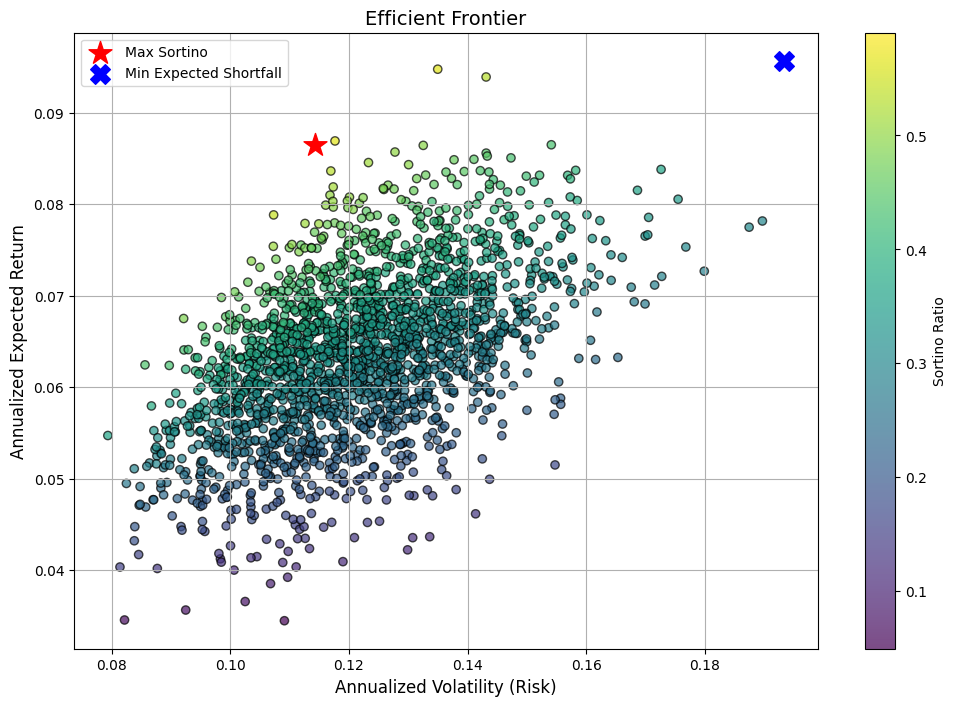

In [ ]:
from scipy.optimize import minimize

# Calculate mean returns and covariance matrix
mean_returns = returns_df.mean() * trading_days
cov_matrix = returns_df.cov() * trading_days
num_assets = len(mean_returns)

# Efficient frontier target returns
target_returns = np.linspace(portfolio_df_clean['Expected Return'].min(),
                             portfolio_df_clean['Expected Return'].max(), 100)

# Store frontier results
frontier_volatility = []

# Constraints: weights sum to 1
def get_portfolio_volatility(weights):
    return np.sqrt(weights.T @ cov_matrix @ weights)

for target in target_returns:
    constraints = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        {'type': 'eq', 'fun': lambda x: x @ mean_returns - target}
    )
    bounds = tuple((0, 1) for _ in range(num_assets))
    result = minimize(get_portfolio_volatility,
                      x0=np.ones(num_assets) / num_assets,
                      method='SLSQP',
                      bounds=bounds,
                      constraints=constraints)

    if result.success:
        frontier_volatility.append(result.fun)
    else:
        frontier_volatility.append(np.nan)

# Plot efficient frontier curve on top of scatter
plt.figure(figsize=(12, 8))

# Scatter of random portfolios
sc = plt.scatter(
    portfolio_df_clean['Volatility'],
    portfolio_df_clean['Expected Return'],
    c=portfolio_df_clean['Sortino Ratio'],
    cmap='viridis',
    alpha=0.7,
    edgecolors='k'
)

plt.plot(frontier_volatility, target_returns, color='black', linewidth=2.5, label='Efficient Frontier')

# Add max Sortino and min ES points again
plt.scatter(best_sortino['Volatility'], best_sortino['Expected Return'], color='red', marker='*', s=300, label='Max Sortino')
plt.scatter(best_es['Volatility'], best_es['Expected Return'], color='blue', marker='X', s=200, label='Min Expected Shortfall')

# Labels and legend
plt.colorbar(sc, label='Sortino Ratio')
plt.xlabel('Annualized Volatility (Risk)', fontsize=12)
plt.ylabel('Annualized Expected Return', fontsize=12)
plt.title('Efficient Frontier with Risk/Return Trade-offs', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


## Preliminary Discussion of the Results

NOTE: This section is currently ongoing. In the future, we will troubleshoot errors and irregularities in this data

### VAR Comparisons Across Different Techniques


Combined 1-Day VaR Comparison (in %):
          Parametric  Historical  Monte Carlo     EVT
ETH-USD       9.2723      8.0706       8.0769  8.3588
BTC-USD       7.2677      6.4525       6.4637  6.5776
BZ=F          4.2551      3.9142       3.9089  3.8960
XLE           3.3962      3.0462       3.0652  3.0372
ZC=F          2.8067      2.3298       2.3314  2.3463
XLK           2.6967      2.5503       2.5541  2.5659
XLF           2.5016      2.2287       2.2277  2.2054
XLY           2.4611      2.3738       2.3748  2.4047
HG=F          2.3413      2.2828       2.2732  2.2733
XLRE          2.3373      2.0032       2.0778  2.0433
SPY           2.0130      1.8631       1.8637  1.8676
XLV           1.8190      1.5824       1.5689  1.6122
TLT           1.6761      1.6247       1.6267  1.5864
XLP           1.6418      1.4341       1.4379  1.3997
GC=F          1.5461      1.5681       1.5784  1.5225
EMB           1.1556      0.9468       0.9347  0.9353
AUDUSD=X      1.0596      1.0689       1.08

<Figure size 1200x920 with 0 Axes>

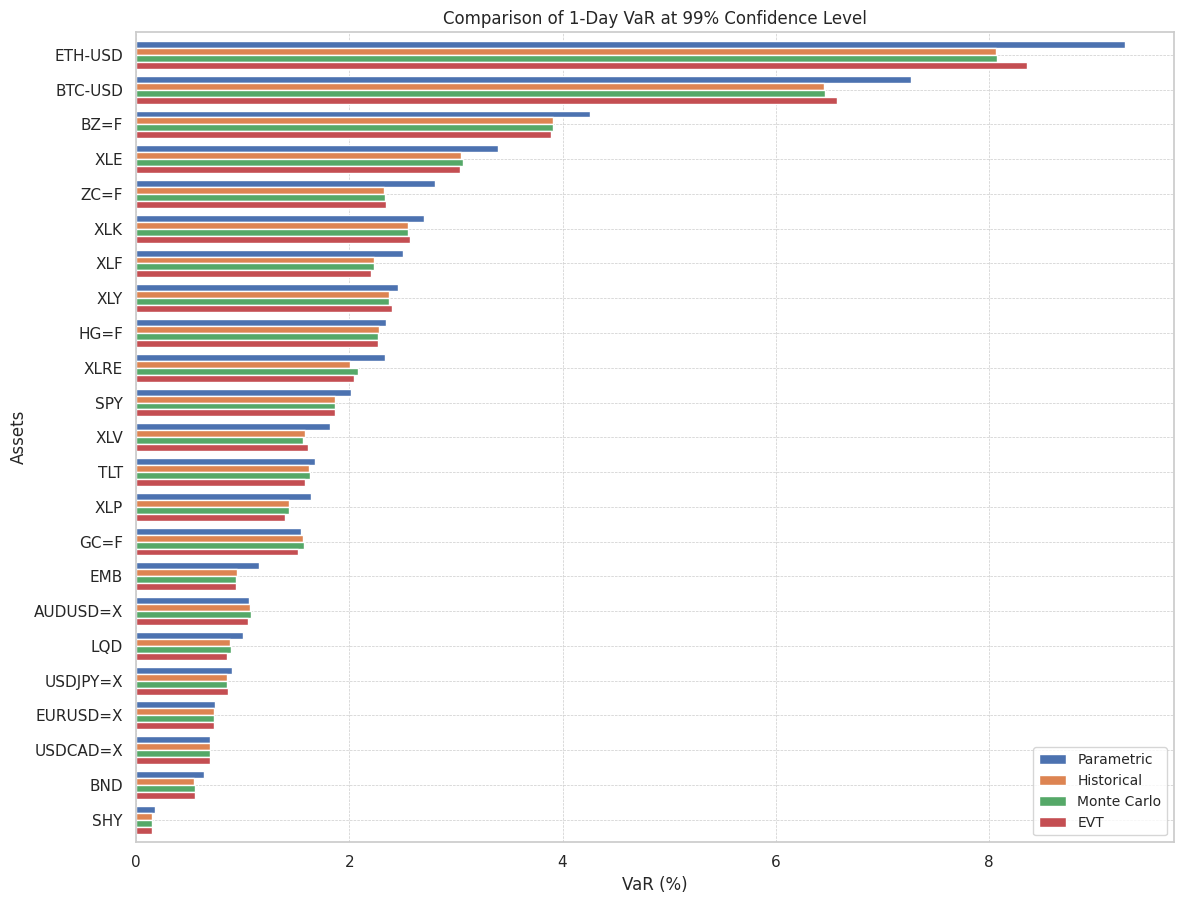

In [ ]:
# Combine all VaR DataFrames
combined_var_df = pd.concat([
    var_df.rename(columns={'1-Day Parametric VaR (%)': 'Parametric'}),
    hist_var_df.rename(columns={'1-Day Historical VaR (%)': 'Historical'}),
    monte_var_df.rename(columns={'1-Day Monte Carlo VaR (%)': 'Monte Carlo'}),
    evt_var_df.rename(columns={'1-Day EVT VaR (%)': 'EVT'})
], axis=1)

# Drop rows with missing values (e.g. EVT missing due to few exceedances)
combined_var_df = combined_var_df.dropna()

# Sort by Parametric VaR for display
combined_var_df = combined_var_df.sort_values(by='Parametric', ascending=False)

# Display combined VaR
print("\nCombined 1-Day VaR Comparison (in %):")
print(combined_var_df.round(4))

# Plot bar chart comparing the VaR methods per asset
plt.figure(figsize=(12, len(combined_var_df) * 0.4))
combined_var_df.plot(kind='barh', figsize=(12, len(combined_var_df) * 0.4), width=0.8)

plt.xlabel('VaR (%)')
plt.ylabel('Assets')
plt.title('Comparison of 1-Day VaR at 99% Confidence Level')
plt.legend(loc='best', fontsize='small')
plt.gca().invert_yaxis()  # So the asset with the largest VaR appears on top
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()



### ES Comparisons Across Different Techniques


Comparison of 1-Day Expected Shortfall (ES) at 99% Confidence Level (in %):
          Parametric  Historical      EVT  Monte Carlo  Average ES
ETH-USD      11.6278     13.6451  11.8159      11.5210     12.1524
BTC-USD       9.1139     10.5329   9.5094       9.0044      9.5402
BZ=F          5.3361      6.4221   5.3327       5.3421      5.6082
XLE           4.2589      4.8010   4.0890       4.2489      4.3495
XLK           3.3818      3.8719   3.5792       3.3197      3.5382
ZC=F          3.5197      3.9738   2.8608       3.5128      3.4668
XLY           3.0863      3.6687   3.4102       3.0169      3.2956
XLF           3.1371      3.6125   3.0728       3.0867      3.2273
HG=F          2.9361      3.2665   3.1284       2.9175      3.0621
XLRE          2.9311      3.3715   2.6786       2.9167      2.9745
SPY           2.5243      3.0482   2.7659       2.5025      2.7102
XLV           2.2811      2.6496   2.1589       2.2402      2.3325
TLT           2.1018      2.2065   2.1085       2.10

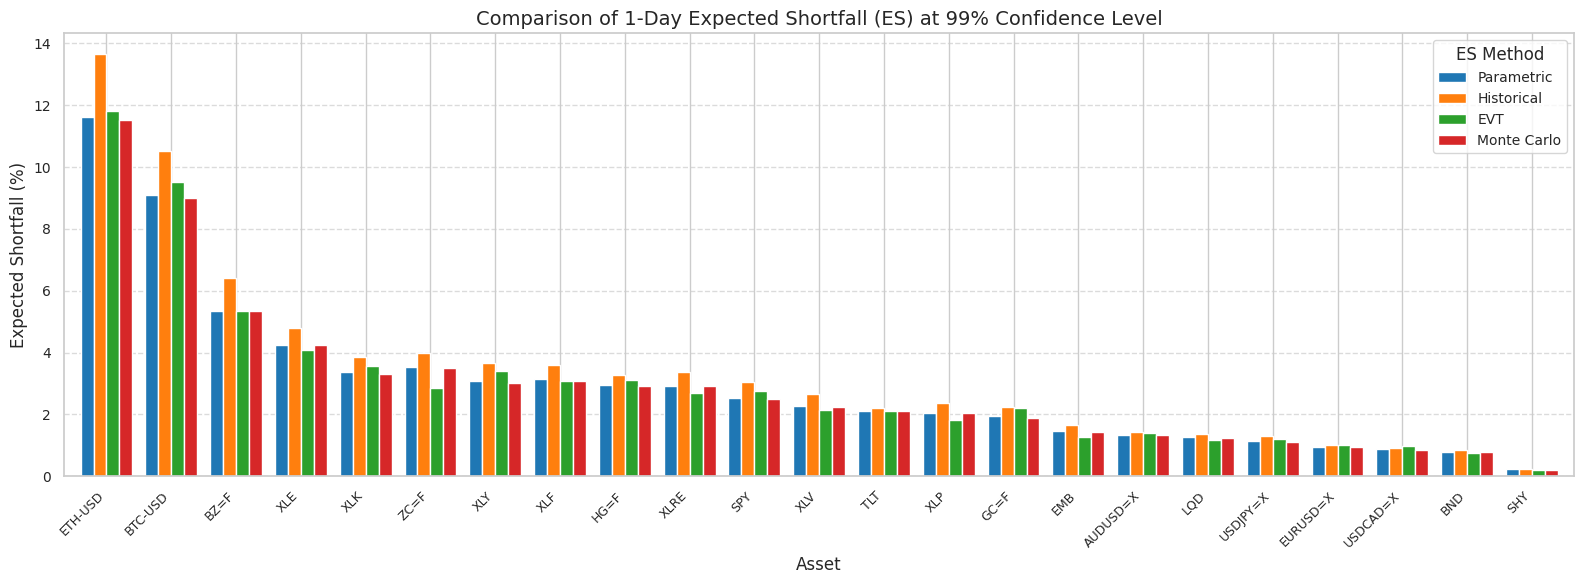

In [ ]:
# =======================================
# Combine all ES estimates into a single DataFrame
# =======================================

# Rename each DataFrame's column to match technique
es_combined_df = pd.concat([
    es_df.rename(columns={'1-Day Parametric Expected Shortfall (%)': 'Parametric'}),
    hist_es_df.rename(columns={'1-Day Historical Expected Shortfall (%)': 'Historical'}),
    evt_es_df.rename(columns={'1-Day EVT ES (%)': 'EVT'})
], axis=1)

# Monte Carlo ES - Estimate from simulation (same as VaR grid above)
monte_carlo_es = {}

for symbol in log_returns.columns:
    mu = log_returns[symbol].mean()
    sigma = log_returns[symbol].std()
    simulated_returns = np.random.normal(loc=mu, scale=sigma, size=100_000)
    var_threshold = np.percentile(simulated_returns, 100 * (1 - confidence_level))
    es_value = simulated_returns[simulated_returns <= var_threshold].mean()
    monte_carlo_es[symbol] = -es_value * 100  # Convert to % and positive loss

# Convert Monte Carlo results to DataFrame
monte_es_df = pd.Series(monte_carlo_es, name='Monte Carlo').to_frame()

# Merge into combined DataFrame
es_combined_df = es_combined_df.join(monte_es_df, how='outer')

# Sort by average ES across all models (or pick one model as default)
es_combined_df['Average ES'] = es_combined_df.mean(axis=1)
es_combined_df = es_combined_df.sort_values(by='Average ES', ascending=False)

# =======================================
# Display the Combined Comparison Table
# =======================================
print("\nComparison of 1-Day Expected Shortfall (ES) at 99% Confidence Level (in %):")
print(es_combined_df.round(4))


import matplotlib.pyplot as plt

# Drop 'Average ES' for clean visualization
es_combined_df_plot = es_combined_df.drop(columns=['Average ES'])

# Plot the ES comparison
es_combined_df_plot.plot(
    kind='bar',
    figsize=(16, 6),
    width=0.8,
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
)

plt.title("Comparison of 1-Day Expected Shortfall (ES) at 99% Confidence Level", fontsize=14)
plt.ylabel("Expected Shortfall (%)", fontsize=12)
plt.xlabel("Asset", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=10)
plt.legend(title="ES Method", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
